<a href="https://colab.research.google.com/github/ScarrryMary/Project_group24-25/blob/main/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](https://avatars.dzeninfra.ru/get-zen_doc/3473288/pub_622e10c767924e29f68c848d_622e170fe8bfec1394f8802d/scale_1200)

## Ещё немного NumPy

### Операторы сравнения и тестирование значений

In [1]:
import numpy as np

In [2]:
a = np.array([1, 3, 0], float)
b = np.array([0, 3, 2], float)

print(a > b)

print(a == b)

print(a <= b)

[ True False False]
[False  True False]
[False  True  True]


In [3]:
a = np.array([1, 3, 0], float)
a > 2

array([False,  True, False])

Операторы any и all могут быть использованы для определения истинны ли хотя бы один или все элементы соответственно:

In [4]:
c = np.array([ True, False, False], bool)
print(np.any(c))

print(np.all(c))

True
False


Комбинированные булевы выражения могут быть применены к массивам по принципу элемент — элемент используя специальные функции logical_and, logical_or и logical_not:

In [5]:
a = np.array([1, 3, 0], float)
np.logical_and(a > 0, a < 3)

array([ True, False, False])

In [6]:
b = np.array([True, False, True], bool)
np.logical_not(b)

array([False,  True, False])

In [7]:
c = np.array([False, True, False], bool)
np.logical_or(b, c)

array([ True,  True,  True])

Функция nonzero возвращает кортеж индексов ненулевых значений. Количество элементов в кортеже равно количеству осей в массиве:

In [8]:
a = np.array([[0, 1], [3, 0]], float)
a.nonzero()

(array([0, 1]), array([1, 0]))

Также можно проверить значения на конечность и NaN(not a number):

In [9]:
a = np.array([1, np.NaN, np.Inf], float)
print("Is NaN? " , np.isnan(a))

print("Is finite? ", np.isfinite(a))

Is NaN?  [False  True False]
Is finite?  [ True False False]


В отличии от списков, массивы также позволяют делать выбор элементов используя другие массивы. Это значит, что мы можем использовать массив для фильтрации специфических подмножеств элементов других массивов.  
Булевы массивы могут быть использованы как массивы для фильтрации:


In [10]:
a = np.array([[6, 4], [5, 9]], float)
print(a >= 6)

a[a >= 6]

[[ True False]
 [False  True]]


array([6., 9.])

Также мы можем записать массив для фильтрации в переменную:

In [11]:
a = np.array([[6, 4], [5, 9]], float)
sel = (a >= 6)
a[sel]

array([6., 9.])

In [12]:
a[np.logical_and(a > 5, a < 9)]


array([6.])

В придачу к булеву выбору, также можно использовать целочисленные массивы. В этом случае, целочисленный массив хранит индексы элементов, которые будут взяты из массива.


In [13]:
a = np.array([2, 4, 6, 8], float)
b = np.array([0, 0, 1, 3, 2, 1], int)
a[b]

array([2., 2., 4., 8., 6., 4.])

Для многомерных массивов, нам необходимо передать несколько одномерных целочисленных массивов в оператор доступа индексу для каждой оси. Потом каждый из массивов проходит такую последовательность: первый элемент соответствует индексу строки, который является первым элементом массива b, второй элемент соответствует индексу столбца, который является первым элементом массива c и так далее. (Первый массив [2, 2] и второй [1, 4], имеем на выходе элементы с индексами [2, 1] и [2, 4]) Пример:

In [14]:
a = np.array([[1, 4], [9, 16]], float)
b = np.array([0, 0, 1, 1, 0], int)
c = np.array([0, 1, 1, 1, 1], int)
a[b,c]

array([ 1.,  4., 16., 16.,  4.])

Специальная функция take доступна для выполнения выборки с целочисленными массивами. Это работает также как и использования оператора взятия по индексу:

In [15]:
a = np.array([2, 4, 6, 8], float)
b = np.array([0, 0, 1, 3, 2, 1], int)

a.take(b)

array([2., 2., 4., 8., 6., 4.])

Функция take также предоставляет аргумент axis (ось) для взятия подсекции многомерного массива вдоль какой-либо оси

In [16]:
a = np.array([[0, 1], [2, 3]], float)
b = np.array([0, 0, 1], int)
a.take(b, axis=0)

array([[0., 1.],
       [0., 1.],
       [2., 3.]])

In [17]:
a.take(b, axis=1)

array([[0., 0., 1.],
       [2., 2., 3.]])

В противоположность к функции take есть функция put, которая будет брать значения из исходного массива и записывать их на специфические индексы в другом put-массиве.

In [18]:
a = np.array([0, 1, 2, 3, 4, 5], float)
b = np.array([9, 8, 7], float)
a.put([0, 3], b)
a

array([9., 1., 2., 8., 4., 5.])

Заметим, что значение 7 из исходного массива b не было использовано, так как только 2 индекса [0, 3] указаны. Исходный массив будет повторен если необходимо в случае не соответствия длин:

In [19]:
a = np.array([0, 1, 2, 3, 4, 5], float)
a.put([0, 3], 5)
a

array([5., 1., 2., 5., 4., 5.])

NumPy также предоставляет набор встроенных функций и методов для работы с линейной алгеброй. Это всё можно найти в под-модуле linalg. Этими модулями также можно оперировать с вырожденными и невырожденными матрицами. Определитель матрицы ищется таким образом:

In [20]:
a = np.array([[4, 2, 0], [9, 3, 7], [1, 2, 1]], float)
np.linalg.det(a)

-48.00000000000003

Также можно найти собственный вектор и собственное значение матрицы:


In [21]:
vals, vecs = np.linalg.eig(a)
print("Собственные значения: ", vals)

print("Собственные векторы: ", vecs)

Собственные значения:  [ 8.85591316  1.9391628  -2.79507597]
Собственные векторы:  [[-0.3663565  -0.54736745  0.25928158]
 [-0.88949768  0.5640176  -0.88091903]
 [-0.27308752  0.61828231  0.39592263]]


Обратная матрица может быть найдена:

In [22]:
b = np.linalg.inv(a)
b

array([[ 0.22916667,  0.04166667, -0.29166667],
       [ 0.04166667, -0.08333333,  0.58333333],
       [-0.3125    ,  0.125     ,  0.125     ]])

In [23]:
np.dot(a, b)

array([[1.00000000e+00, 5.55111512e-17, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 2.22044605e-16],
       [0.00000000e+00, 1.38777878e-17, 1.00000000e+00]])

## Математика многочленов

NumPy предоставляет методы для работы с полиномами. Передавая список корней, можно получить коэффициенты уравнения:


In [24]:
np.poly([-1, 1, 1, 10])

array([  1., -11.,   9.,  11., -10.])

Здесь, массив возвращает коэффициенты соответствующие уравнению: image.png

Может быть произведена и обратная операция: передавая список коэффициентов, функция root вернет все корни многочлена:

In [25]:
np.roots([1, 4, -2, 3])

array([-4.5797401 +0.j        ,  0.28987005+0.75566815j,
        0.28987005-0.75566815j])

В уравнении image.png два корня мнимые.

Коэффициенты многочлена могут быть интегрированы. Рассмотрим интегрирование image.png

In [26]:
np.polyint([1, 1, 1, 1])

array([0.25      , 0.33333333, 0.5       , 1.        , 0.        ])

Аналогично, могут быть взяты производные:

In [27]:
np.polyder([1./4., 1./3., 1./2., 1., 0.])

array([1., 1., 1., 1.])

Функции polyadd, polysub, polymul и polydiv также поддерживают суммирование, вычитание, умножение и деление коэффициентов многочлена, соответственно.

Функция polyval подставляет в многочлен заданное значение. Рассмотрим многочлен image.png при x = 4:

In [28]:
np.polyval([1, -2, 0, 2], 4)

34

В заключение, функция polyfit может быть использована для подбора (интерполяции) многочлена заданного порядка к набору значений:

In [29]:
x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [0, 2, 1, 3, 7, 10, 11, 19]
arr = np.polyfit(x, y, 2)
arr

array([ 0.375     , -0.88690476,  1.05357143])

In [30]:
import matplotlib.pyplot as plt

[ 0.54166667  0.7797619   1.76785714  3.50595238  5.99404762  9.23214286
 13.2202381  17.95833333]


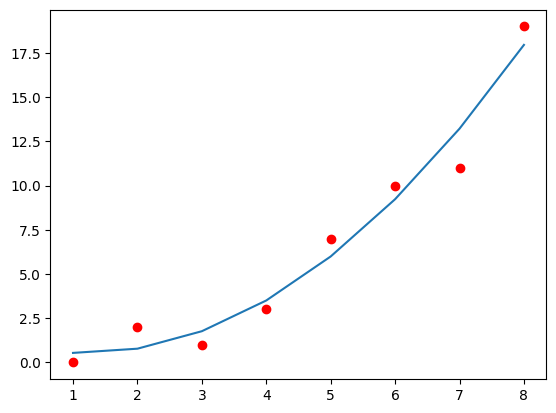

In [31]:
def approx(x, arr, p):
  for i in range(len(x)):
    p[i] = arr[0]* x[i]**2 + arr[1]*x[i] + arr[2]
  return p

p = np.zeros(len(x))
approx(x, arr,p)
print(p)

#plt.plot(x, y)
plt.scatter(x, y, c='r')
plt.plot(x, p)

Более утонченные интерполяционные функции могут быть найдены в SciPy (comming soon!)

### Случайные числа

Для генерации случайных чисел мы используем встроенный в NumPy генератор псевдослучайных чисел в под-модуле random. Числа являются псевдо случайными, в том плане что, они сгенерированы детерминистически из порождающего элемента (seed number), но рассредоточены в статистическом сходстве с случайным образом. Для генерации NumPy использует особенный алгоритм который имеет название Mersenne Twister.
Задать порождающий элемент последовательности случайных чисел можно так:

In [32]:
np.random.seed(293423)

Массив случайных чисел из полуинтервала [0.0, 1.0) может быть сгенерирован так:

In [33]:
np.random.rand(5)

array([0.33677247, 0.52693437, 0.79529578, 0.78867702, 0.02147624])

Функция rand может быть использована для генерации двумерных массивов, или можно использовать функцию reshape:

In [34]:
np.random.rand(2,3)

array([[0.84612516, 0.0704939 , 0.1526965 ],
       [0.77831701, 0.80821151, 0.82198398]])

In [35]:
np.random.rand(6).reshape((2,3))

array([[0.90239653, 0.8385685 , 0.02638565],
       [0.33681448, 0.46480928, 0.61686496]])

Для генерации единичного случайного числа на интервале [0.0, 1.0):


In [36]:
np.random.random()

0.43767262538051455

Для генерации случайного целочисленного числа в диапазоне [min, max) используем функцию randint(min, max):

In [37]:
np.random.randint(5, 10)

5

Чтобы кокнуло:

> В каждом нашем примере, мы генерировали числа из непрерывного равномерного распределения. NumPy также включает генераторы для других распределений, таких как: Бета, биномиальное, хи-квадрат, Дирихле, экспоненциальное, Фишера, Гамма, геометрическое, Гамбала, гипергеометрическое, Лапласа, логистическое, логнормальное, логарифмическое, мультиномиальное, многомерное нормальное, отрицательное биномиальное, нецентральное хи-квадрат, нецентральное Фишера, нормальное (Гаусса), Парето, Пуассона, степенное, Рэлея, Коши, Стьюдента, треугольное, Фон-Миса, Вальда, Вейбулла и Ципфа.



Для генерации числа из нормального распределения (Гаусса) при среднем значении μ = 1.5 и стандартной девиации σ = 4.0:

In [38]:
np.random.normal(1.5, 4.0)

2.4760175421277903

Для получении числа из нормального распределения (μ = 0, σ = 1), без указания аргументов:

In [39]:
np.random.normal()

-0.4995906993474773

Для генерации нескольких значений используем аргумент size:

In [40]:
np.random.normal(size=5)

array([-0.87581376,  1.38762794,  0.11966093, -0.12412135,  0.24052871])

Модуль для генерации случайных чисел также может быть использован для случайного распределения значений в списке. Это может быть полезно если мы хотим случайно распределить значения в списке:

In [41]:
l = np.arange(10)
np.random.shuffle(l)
l

array([1, 3, 2, 8, 5, 9, 0, 4, 6, 7])

## Pandas


In [42]:
import pandas as pd

In [43]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')
anime_modified = anime.set_index('name')

FileNotFoundError: [Errno 2] No such file or directory: 'anime.csv'

**DataFrame** — это двумерная структура данных, похожая на таблицу в SQL или на лист в Excel.

**DataFrame** поддерживает столбцы различных типов данных, что удобно для задач по обработке данных, включая статистический анализ, очистку данных, а также их визуализацию.

In [ ]:
type(anime)

In [ ]:
rating

Существует похожая функция для загрузки данных из Excel-файлов — pd.read_excel.  

**Создание датафрейма из данных, введённых вручную**

Может пригодиться, когда нужно вручную ввести в программу простые данные. Например — если нужно оценить изменения, претерпеваемые данными, проходящими через конвейер обработки данных.

In [ ]:
df = pd.DataFrame([[1,'Bob', 'Builder'],
                  [2,'Sally', 'Baker'],
                  [3,'Scott', 'Candle Stick Maker']],
columns=['id','name', 'occupation'])
df

In [ ]:
len(df)

**Копирование датафрейма**

Копирование датафреймов может пригодиться в ситуациях, когда требуется внести в данные изменения, но при этом надо и сохранить оригинал. Если датафреймы нужно копировать, то рекомендуется делать это сразу после их загрузки.

In [ ]:
anime_copy = anime.copy(deep=True)

**Экспорт в формат CSV**
Пример сохранения первых 10 строк датафрейма


In [ ]:
rating[:10].to_csv('saved_ratings.csv', index=False)

**Получение n записей из начала или конца датафрейма**


In [ ]:
anime.head(3)

In [ ]:
rating.tail(1)

**Подсчёт количества уникальных значений в столбце**

In [ ]:
len(rating['user_id'].unique())

**Получение сведений о датафрейме**

In [ ]:
anime.info()

**Вывод статистических сведений о датафрейме**

In [ ]:
anime.describe()

**Подсчёт количества значений**

In [ ]:
anime.type.value_counts()

### Извлечение информации из датафреймов  

**Создание списка или объекта Series на основе значений столбца**

In [ ]:
anime['genre'].tolist()

In [ ]:
anime_modified.index

**Получение списка значений столбцов**

In [ ]:
anime.columns.tolist()

### Добавление данных в датафрейм и удаление их из него

**Присоединение к датафрейму нового столбца с заданным значением**

In [ ]:
anime['train set'] = True
anime.head(10)

**Создание нового датафрейма из подмножества столбцов**

In [ ]:
anime[['name','episodes']]

**Удаление заданных столбцов**

In [ ]:
anime.drop(['anime_id', 'genre', 'members'], axis=1).head()

**Добавление в датафрейм строки с суммой значений из других строк**  
Команда вида df.sum(axis=1) позволяет суммировать значения в столбцах

In [ ]:
df = pd.DataFrame([[1,'Bob', 8000],
                  [2,'Sally', 9000],
                  [3,'Scott', 20]], columns=['id','name', 'power level'])
df.loc[len(df.index)] = df.sum(axis=0) #сумма строк
df

### Комбинирование датафреймов  
**Конкатенация двух датафреймов**  
Эта методика применима в ситуациях, когда имеются два датафрейма с одинаковыми столбцами, которые нужно скомбинировать.


In [ ]:
df1 = anime[0:2]
df2 = anime[2:4]
df2

In [ ]:
pd.concat([df1, df2], ignore_index=True)

**Слияние датафреймов**  
Функция df.merge, которую мы тут рассмотрим, похожа на левое соединение SQL. Она применяется тогда, когда два датафрейма нужно объединить по некоему столбцу - в данном случае это столбец rating.

In [ ]:
rating.merge(anime, left_on='anime_id', right_on='anime_id', suffixes=('_left', '_right'))

### Фильтрация  
**Получение строк с нужными индексными значениями**  
Индексными значениями датафрейма anime_modified являются названия аниме. Обратите внимание на то, как мы используем эти названия для выбора конкретных столбцов.

In [ ]:
anime_modified.loc[['Haikyuu!! Second Season','Gintama']]

**Получение строк по числовым индексам**  
Эта методика отличается от той, которая описана в предыдущем разделе. При использовании функции df.iloc первой строке назначается индекс 0, второй — индекс 1, и так далее. Такие индексы назначаются строкам даже в том случае, если датафрейм был модифицирован и в его индексном столбце используются строковые значения.

In [ ]:
anime_modified.iloc[0:3]

**Получение строк по заданным значениям столбцов**  
Для получения строк датафрейма в ситуации, когда имеется список значений столбцов, можно воспользоваться следующей командой:


In [ ]:
anime[anime['type'].isin(['TV', 'Movie'])]

Если нас интересует единственное значение — можно воспользоваться такой конструкцией:


In [ ]:
anime[anime['type'] == 'TV']

**Получение среза датафрейма**  
Эта техника напоминает получение среза списка. А именно, речь идёт о получении фрагмента датафрейма, содержащего строки, соответствующие заданной конфигурации индексов.

In [ ]:
anime[1:3]

**Фильтрация по значению**  
Из датафреймов можно выбирать строки, соответствующие заданному условию. Обратите внимание на то, что при использовании этого метода сохраняются существующие индексные значения.

In [ ]:
anime[anime['rating'] > 8]

### Сортировка  
Для сортировки датафреймов по значениям столбцов можно воспользоваться функцией df.sort_values:

In [ ]:
anime.sort_values('rating', ascending=False) #сортирует DataFrame по возрастанию или убыванию по значениям вдоль любой оси

### Агрегирование  
**Функция df.groupby и подсчёт количества записей**  
В приведенном выше примере мы использовали функцию groupby() для разделения и отдельного создания нового фрейма данных со всеми данными, принадлежащими столбцу genre, соответственно.

In [ ]:
anime.groupby('genre').first()

In [ ]:
anime.groupby(['genre', 'type']).first()

**Агрегирование столбцов различными способами**


In [ ]:
anime.groupby(["type"]).agg({
  "rating": "sum",
  "episodes": "count",
  "name": "last"
}).reset_index()

**Создание сводной таблицы**

In [ ]:
tmp_df = rating.copy()
tmp_df.sort_values('user_id', ascending=True, inplace=True)
tmp_df = tmp_df[tmp_df.user_id < 10]
tmp_df = tmp_df[tmp_df.anime_id < 30]
tmp_df = tmp_df[tmp_df.rating != -1]
pd.pivot_table(tmp_df, values='rating', index=['user_id'], columns=['anime_id'], aggfunc=np.sum, fill_value=0)

### Очистка данных  
**Запись в ячейки, содержащие значение NaN, какого-то другого значения**  
В этом примере мы создаём такую же сводную таблицу, как и ранее, но без использования fill_value=0. А затем используем функцию fillna(0) для замены значений NaN на 0.


In [ ]:
pivot = pd.pivot_table(tmp_df, values='rating', index=['user_id'], columns=['anime_id'], aggfunc=np.sum)
pivot.fillna(0)

### Полезности
**Отбор случайных образцов из набора данных**    
Можно использовать функцию df.sample, если нужно получить небольшой случайный набор строк из большого датафрейма. Если используется параметр frac=1, то функция позволяет получить аналог исходного датафрейма, строки которого будут перемешаны.

In [ ]:
anime.sample(frac=0.25) #25%

**Перебор строк датафрейма**  
Следующая конструкция позволяет перебирать строки датафрейма:

In [ ]:
for idx,row in anime[:2].iterrows():
    print(idx, row)

## Matplotlib во всех своих проявлениях  

In [9]:
!pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.7.1
0.13.1


<ipython-input-9-5b1a51bda9a3>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### 1) Точечный график
**Scatteplot** — это классический и фундаментальный вид диаграммы, используемый для изучения взаимосвязи между двумя переменными. Если у вас есть несколько групп в ваших данных, вы можете визуализировать каждую группу в другом цвете. В matplotlib вы можете легко сделать это, используя plt.scatterplot().

<ipython-input-4-97fcc94c4d34>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter('area', 'poptotal',


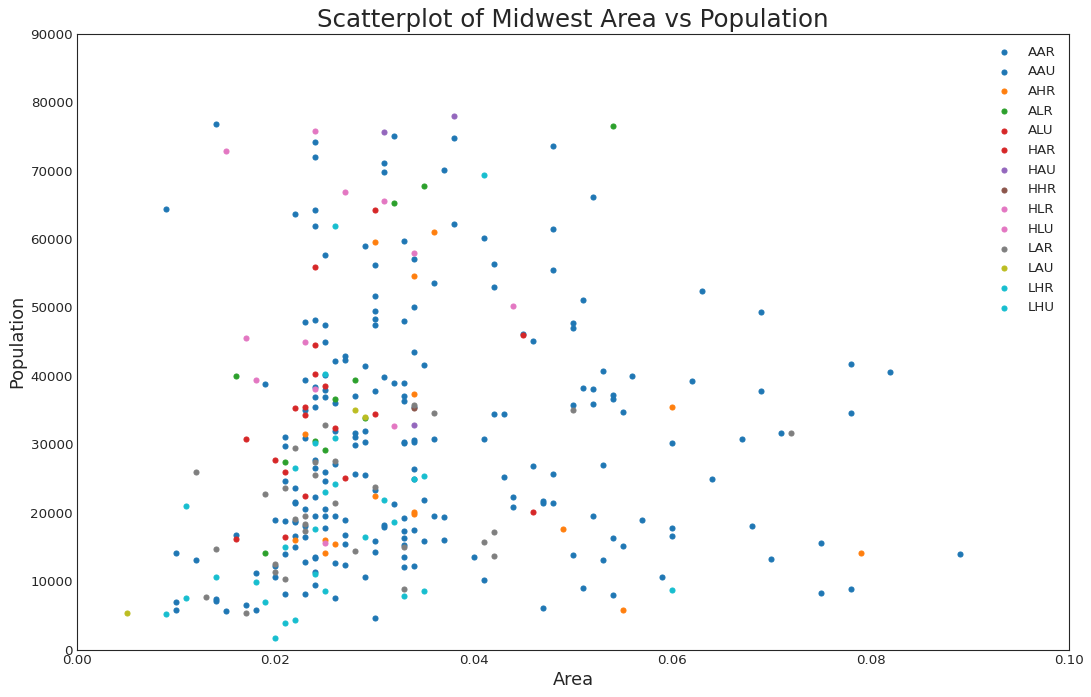

In [4]:
# Import dataset
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Prepare Data
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal',
                data=midwest.loc[midwest.category==category, :],
                s=20, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)
plt.show()

### 2) Пузырьковая диаграмма с захватом группы  
Иногда хочется показать группу точек внутри границы, чтобы подчеркнуть их важность. В этом примере мы получаем записи из фрейма данных, которые должны быть выделены, и передаем их в encircle() описанный в приведенном ниже коде.

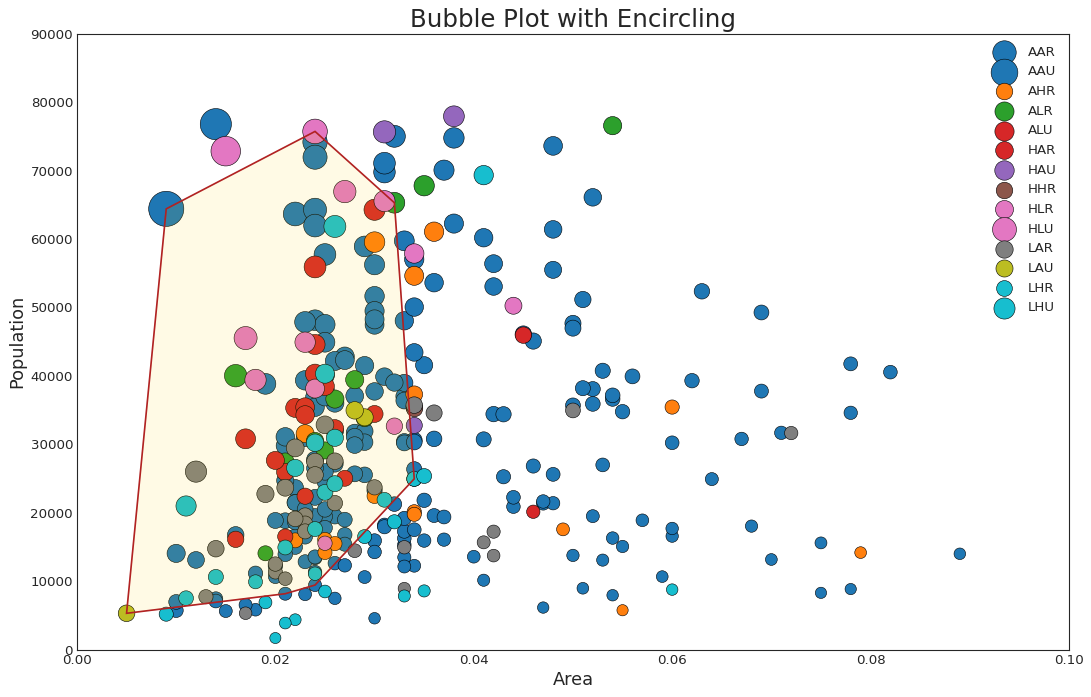

In [5]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', c=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]

# Draw polygon surrounding vertices
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)
plt.show()

### 3) График линейной регрессии best fit  
Если вы хотите понять, как две переменные изменяются по отношению друг к другу, лучше всего подойдет линия best fit. На графике ниже показано, как best fit отличается среди различных групп данных. Чтобы отключить группировки и просто нарисовать одну линию best fit для всего набора данных, удалите параметр hue='cyl' из sns.lmplot() ниже.

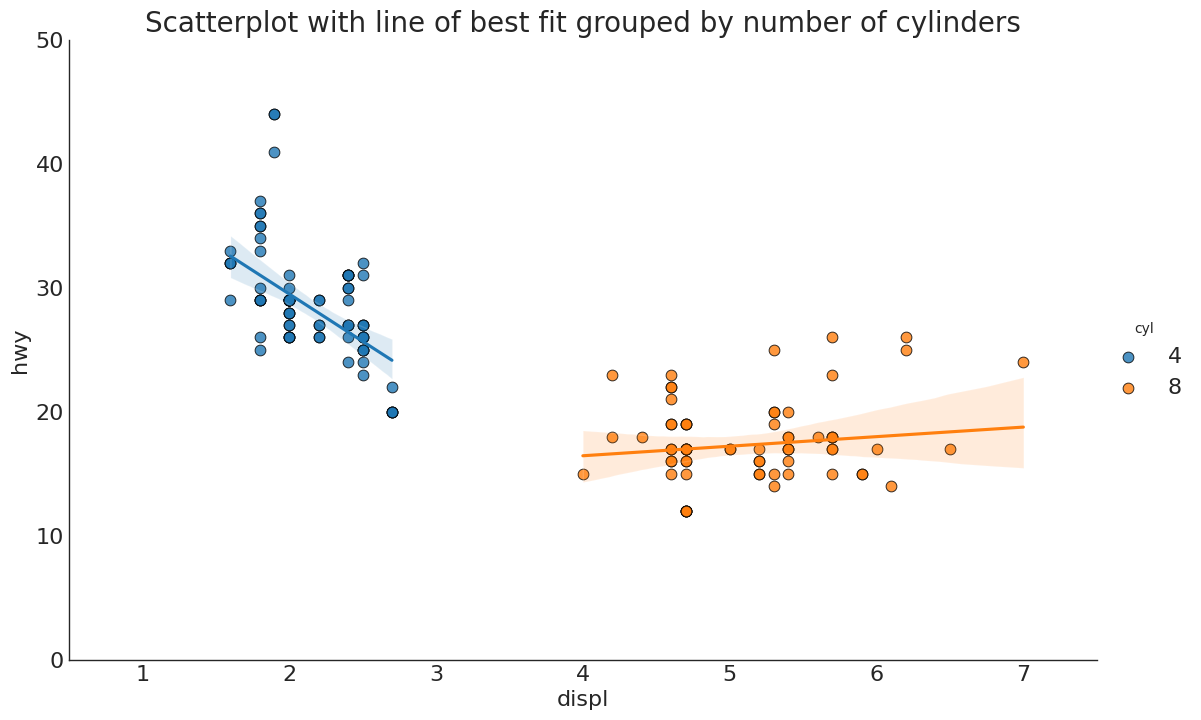

In [6]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select,
                     height=7, aspect=1.6, robust=True, palette='tab10',
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

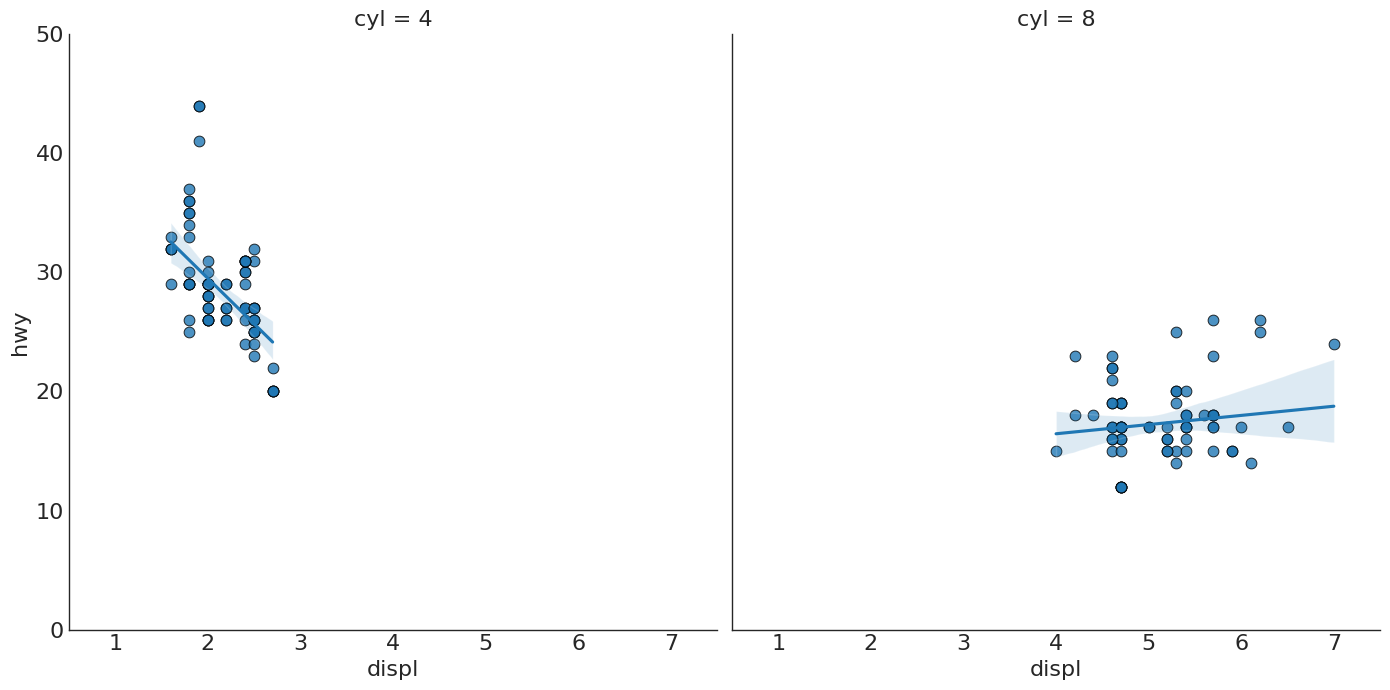

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Each line in its own column
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy",
                     data=df_select,
                     height=7,
                     robust=True,
                     palette='Set1',
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

### 4) Stripplot

Часто несколько точек данных имеют одинаковые значения X и Y. В результате несколько точек наносятся друг на друга и скрываются. Чтобы избежать этого, слегка раздвиньте точки, чтобы вы могли видеть их визуально. Это удобно делать с помощью стрипплота stripplot().

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


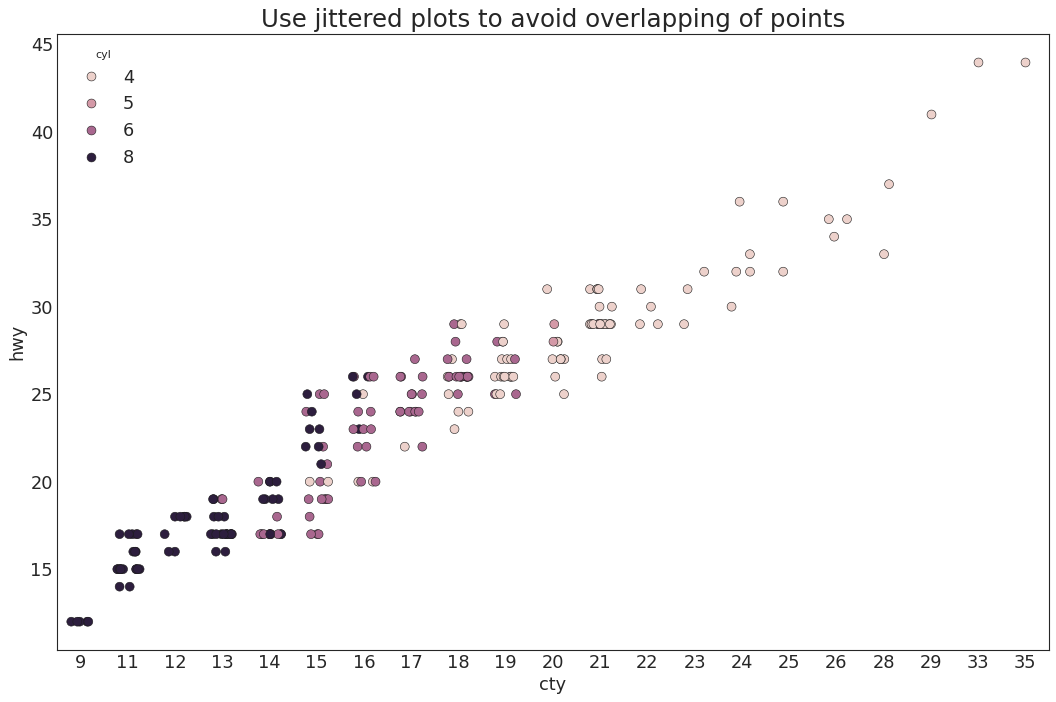

In [85]:
# Import Data
df_new = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
sns.stripplot(x = df_new.cty, y = df_new.hwy, data = df_new, hue = 'cyl', jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

### 5) График подсчета (Counts Plot)
Другим вариантом, позволяющим избежать проблемы наложения точек, является увеличение размера точки в зависимости от того, сколько точек лежит в этом месте. Таким образом, чем больше размер точки, тем больше концентрация точек вокруг нее.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


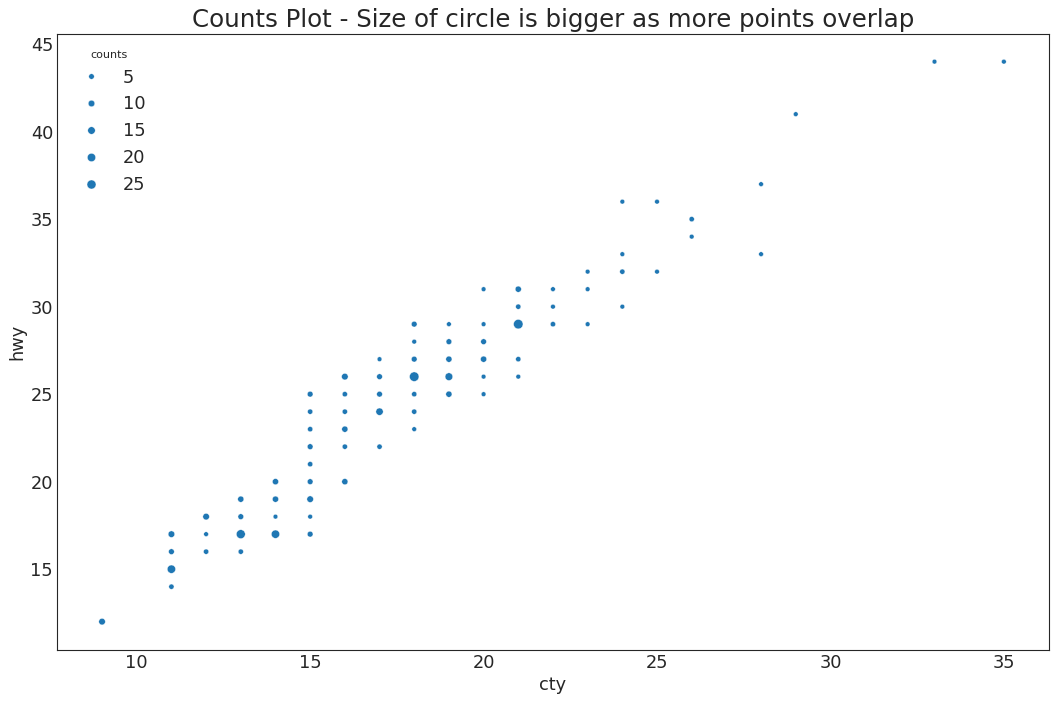

In [24]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
sns.scatterplot(x = df_counts.cty, y= df_counts.hwy, size=df_counts.counts*2, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

In [30]:
df.groupby(['hwy', 'cty']).first()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

manufacturer                model  displ  year  cyl       trans drv  \
hwy cty                                                                       
12  9          dodge    dakota pickup 4wd    4.7  2008    8    auto(l5)   4   
14  11     chevrolet      k1500 tahoe 4wd    5.3  2008    8    auto(l4)   4   
15  11     chevrolet   c1500 suburban 2wd    5.3  2008    8    auto(l4)   r   
16  11         dodge          durango 4wd    5.2  1999    8    auto(l4)   4   
    12         dodge  ram 1500 pickup 4wd    4.7  2008    8  manual(m6)   4   
...              ...                  ...    ...   ...  ...         ...  ..   
36  25         honda                civic    1.8  2008    4    auto(l5)   f   
37  28        toyota              corolla    1.8  2008    4  manual(m5)   f   
41  29    volkswagen           new beetle    1.9  1999    4    auto(l4)   f   
44  33    volkswagen                jetta    1.9  1999    4  manual(m5)   f   
    35    volkswagen           new beetle    1.9  1999    4  manual(m5)   f   

        fl       class  
hwy cty                 
12  9    e      pickup  
14  11   e         suv  
15  11   e         suv  
16  11   r         suv  
    12   r      pickup  
...     ..         ...  
36  25   r  subcompact  
37  28   r     compact  
41  29   d  subcompact  
44  33   d     compact  
    35   d  subcompact  

[78 rows x 9 columns]

### 6) Построчная гистограмма  
Построчные гистограммы имеют гистограмму вдоль переменных оси X и Y. Это используется для визуализации отношений между X и Y вместе с одномерным распределением X и Y по отдельности. Этот график часто используется в анализе данных (EDA).

<ipython-input-25-7bf561c6d974>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_main.set_xticklabels(xlabels)


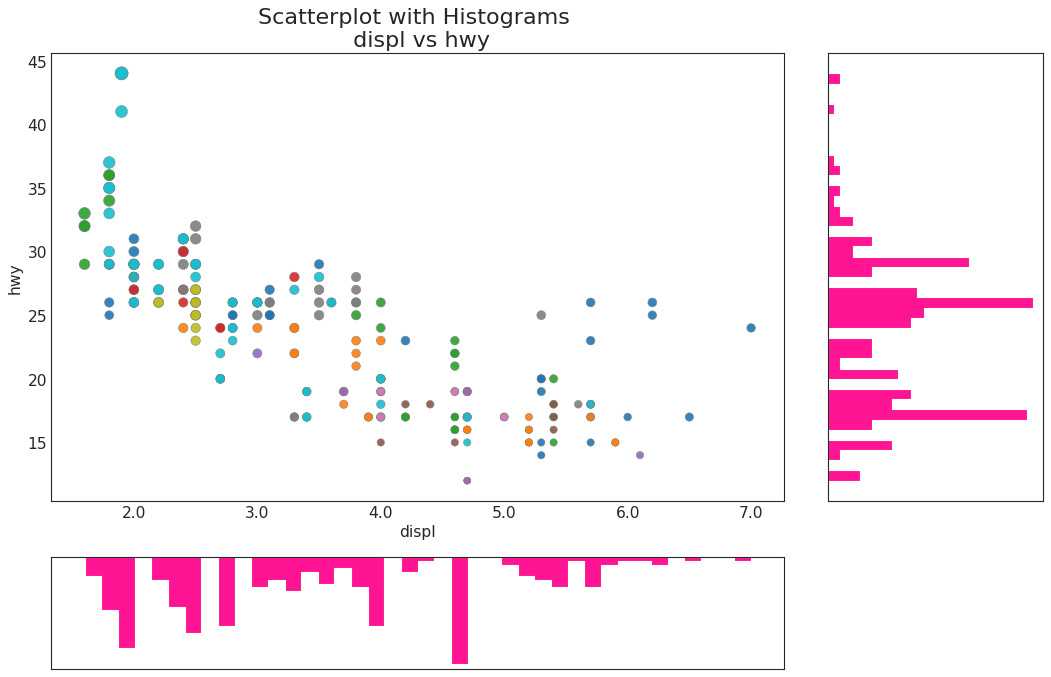

In [25]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

### 7) Boxplot  
Boxplot служит той же цели, что и построчная гистограмма. Тем не менее, этот график помогает точно определить медиану, 25-й и 75-й персентили X и Y.

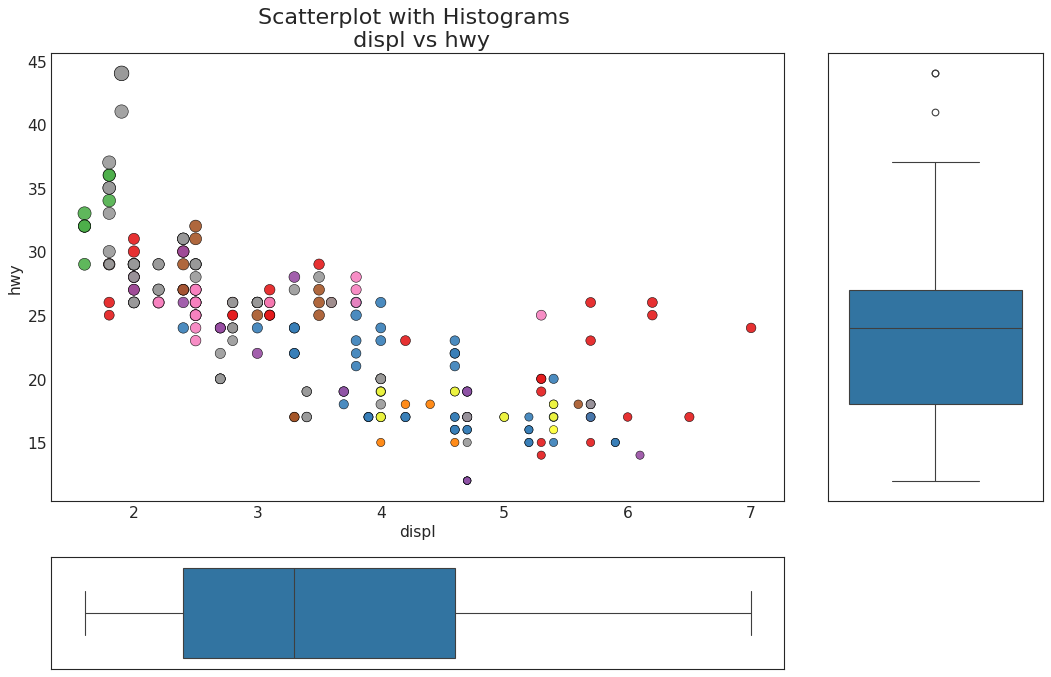

In [36]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

### 8) Диаграмма корреляции  
Диаграмма корреляции используется для визуального просмотра метрики корреляции между всеми возможными парами числовых переменных в данном наборе данных (или двумерном массиве).

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


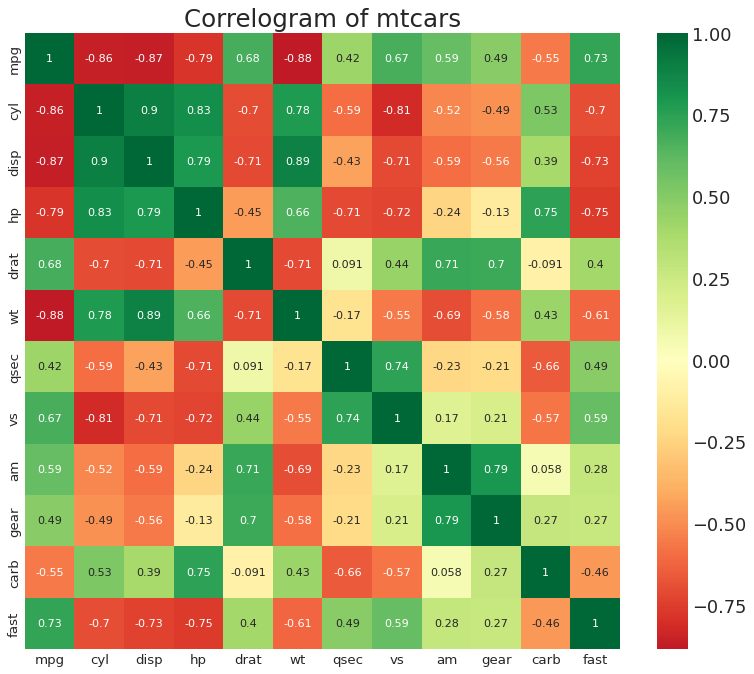

In [49]:
# Import Dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df.head()
df_new =  df.drop(['cars', 'carname'], axis=1)
df_new.head()

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_new.corr(), xticklabels=df_new.corr().columns, yticklabels=df_new.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 9) Парный график

Часто используется в исследовательском анализе, чтобы понять взаимосвязь между всеми возможными парами числовых переменных. Это обязательный инструмент для двумерного анализа.

<Figure size 800x640 with 0 Axes>

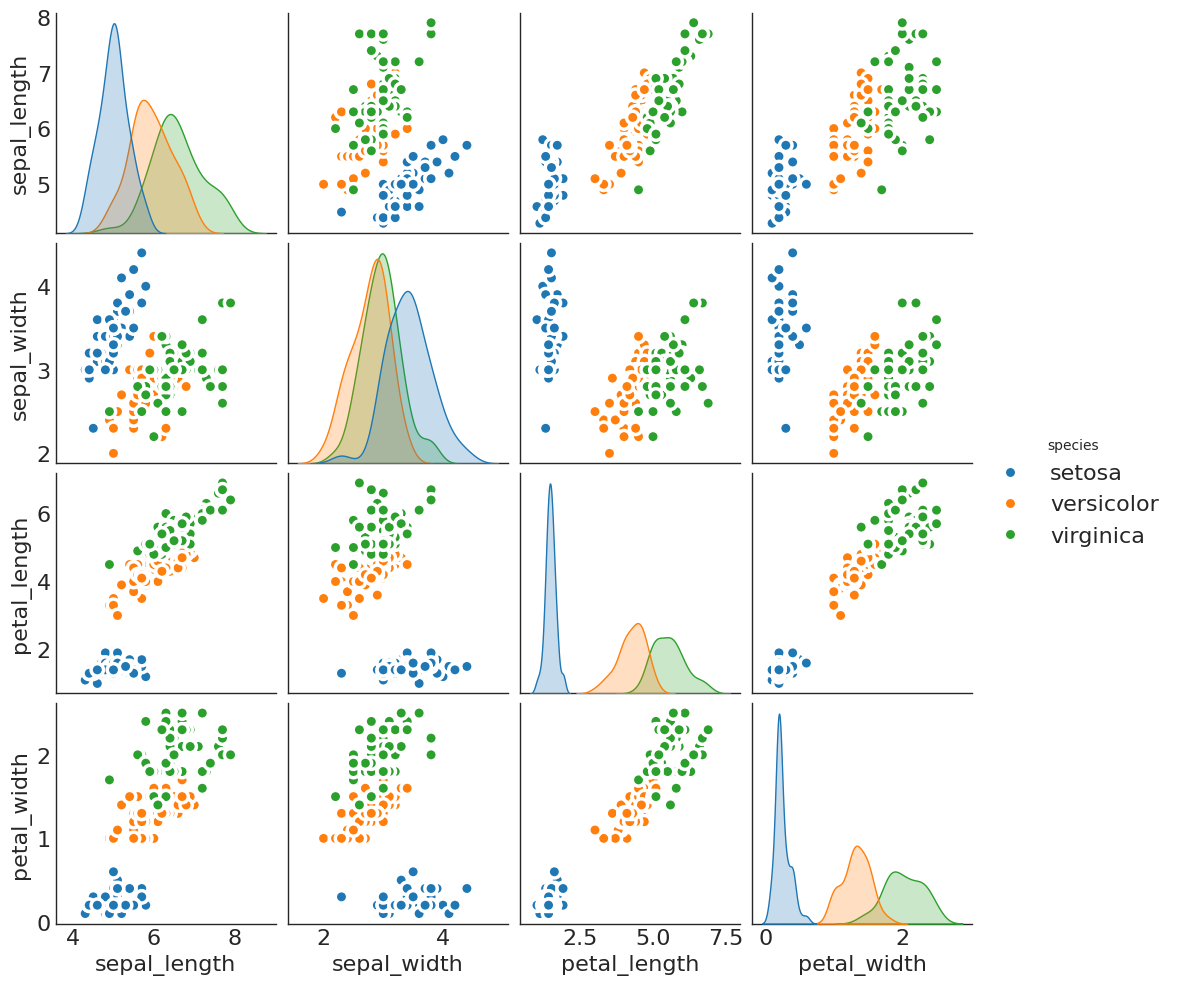

In [50]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

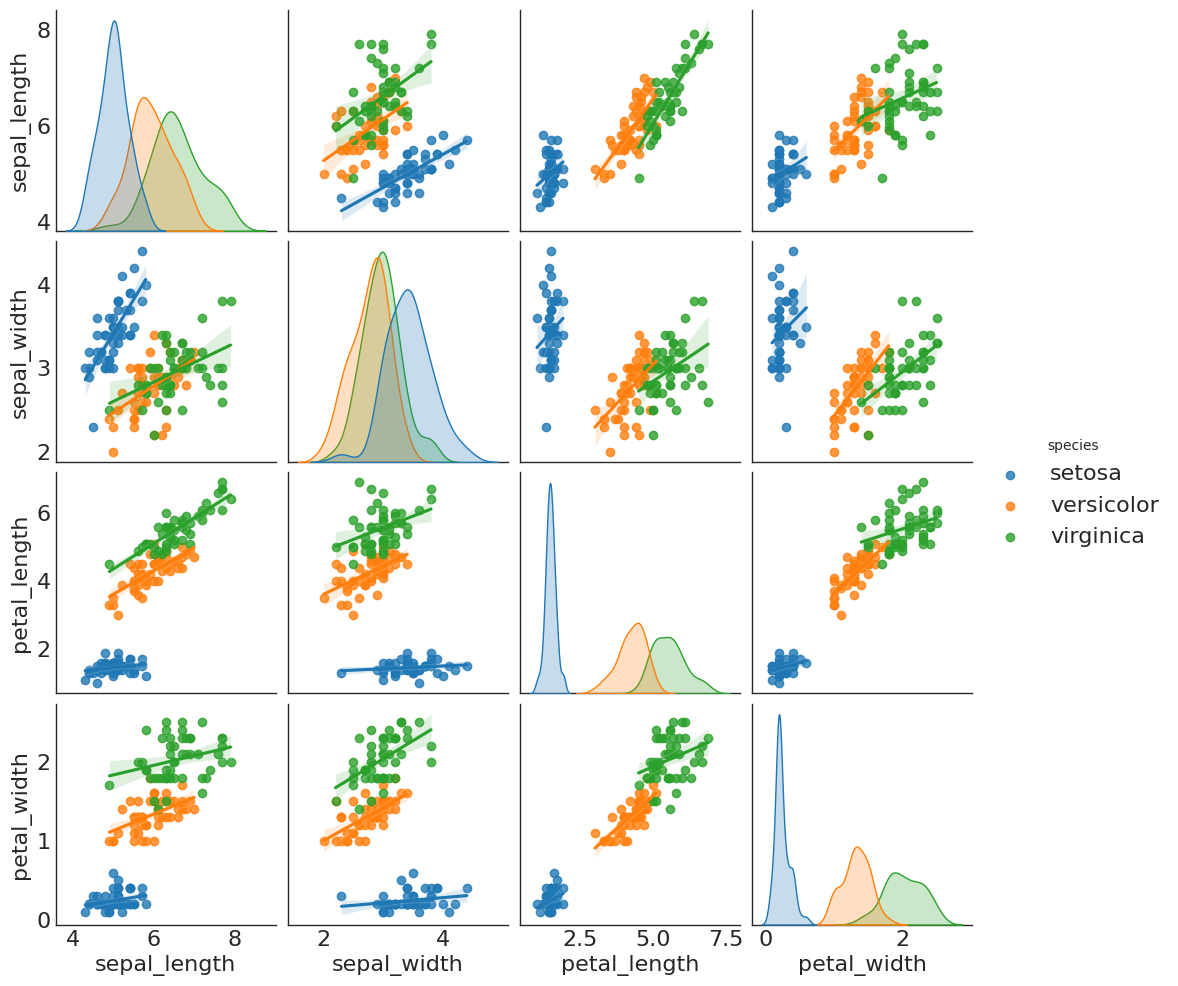

In [51]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()

### 10) Расходящиеся стобцы

Если вы хотите увидеть, как элементы меняются в зависимости от одной метрики, и визуализировать порядок и величину этой дисперсии, расходящиеся стобцы — отличный инструмент. Он помогает быстро дифференцировать производительность групп в ваших данных, является достаточно интуитивным и мгновенно передает смысл.

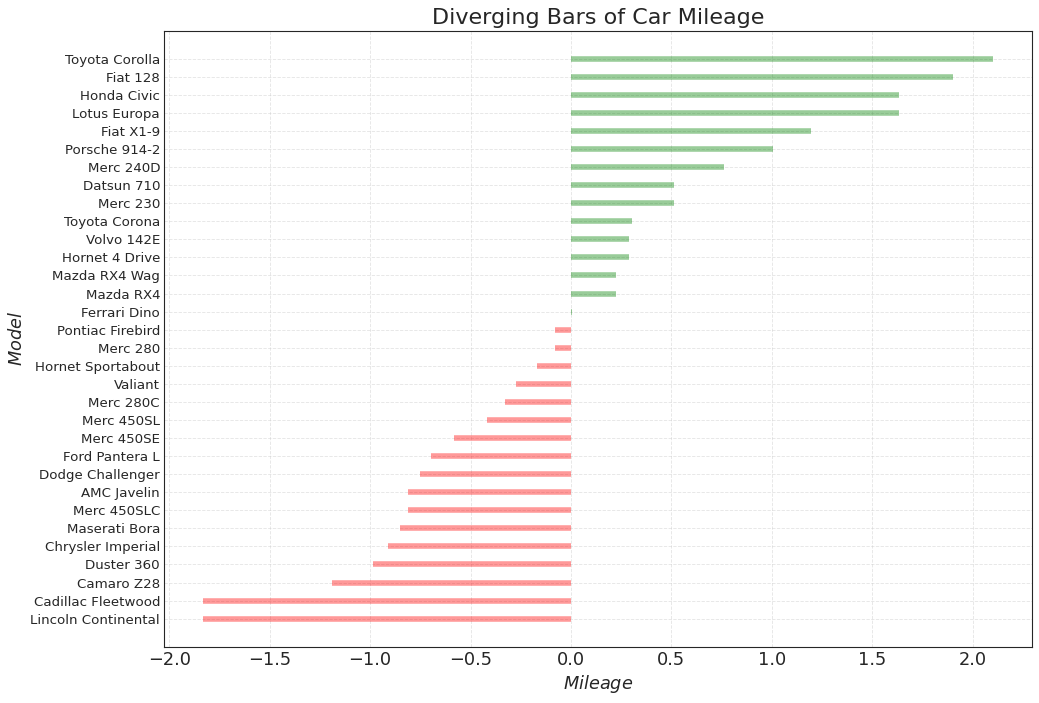

In [52]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

### 11) Расходящиеся стобцы с текстом

— похожи на расходящиеся столбцы, и это предпочтительнее, если вы хотите показать значимость каждого элемента в диаграмме в хорошем и презентабельном виде.


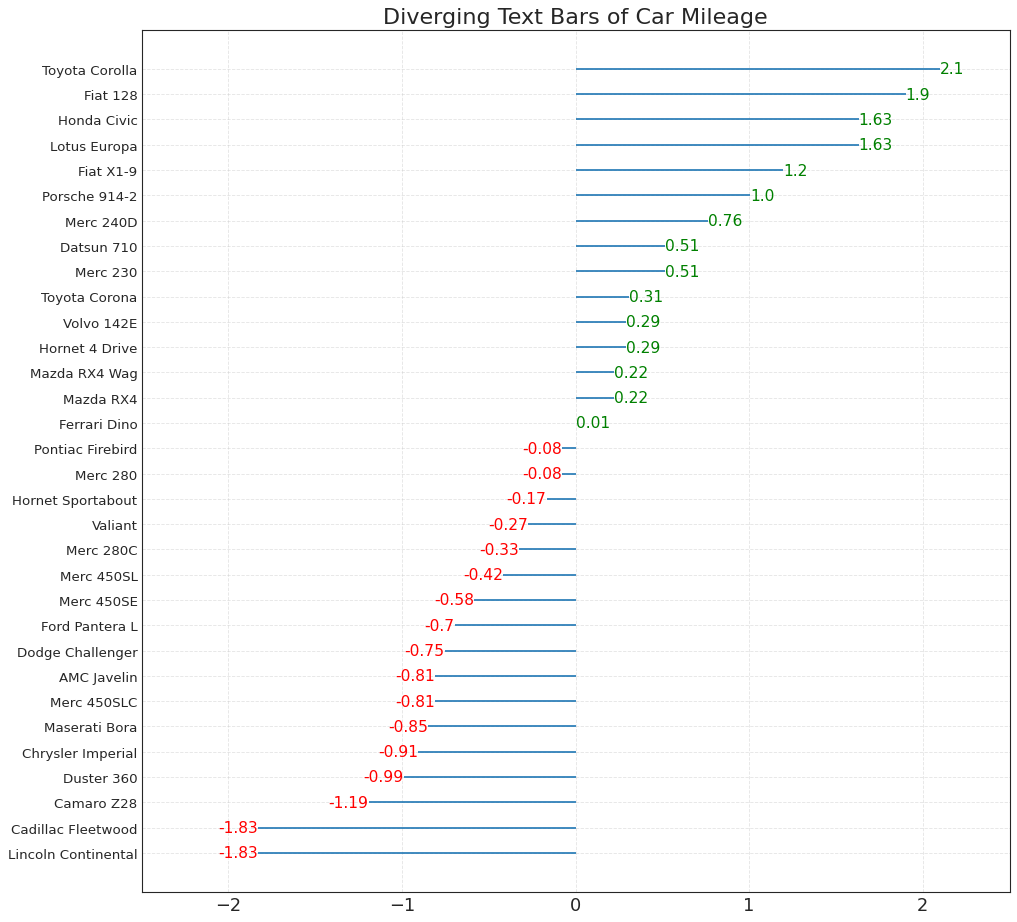

In [53]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left',
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

### 12) Расходящиеся точки

График расходящихся точек также похож на расходящиеся столбцы. Однако по сравнению с расходящимися столбиками, отсутствие столбцов уменьшает степень контрастности и несоответствия между группами.

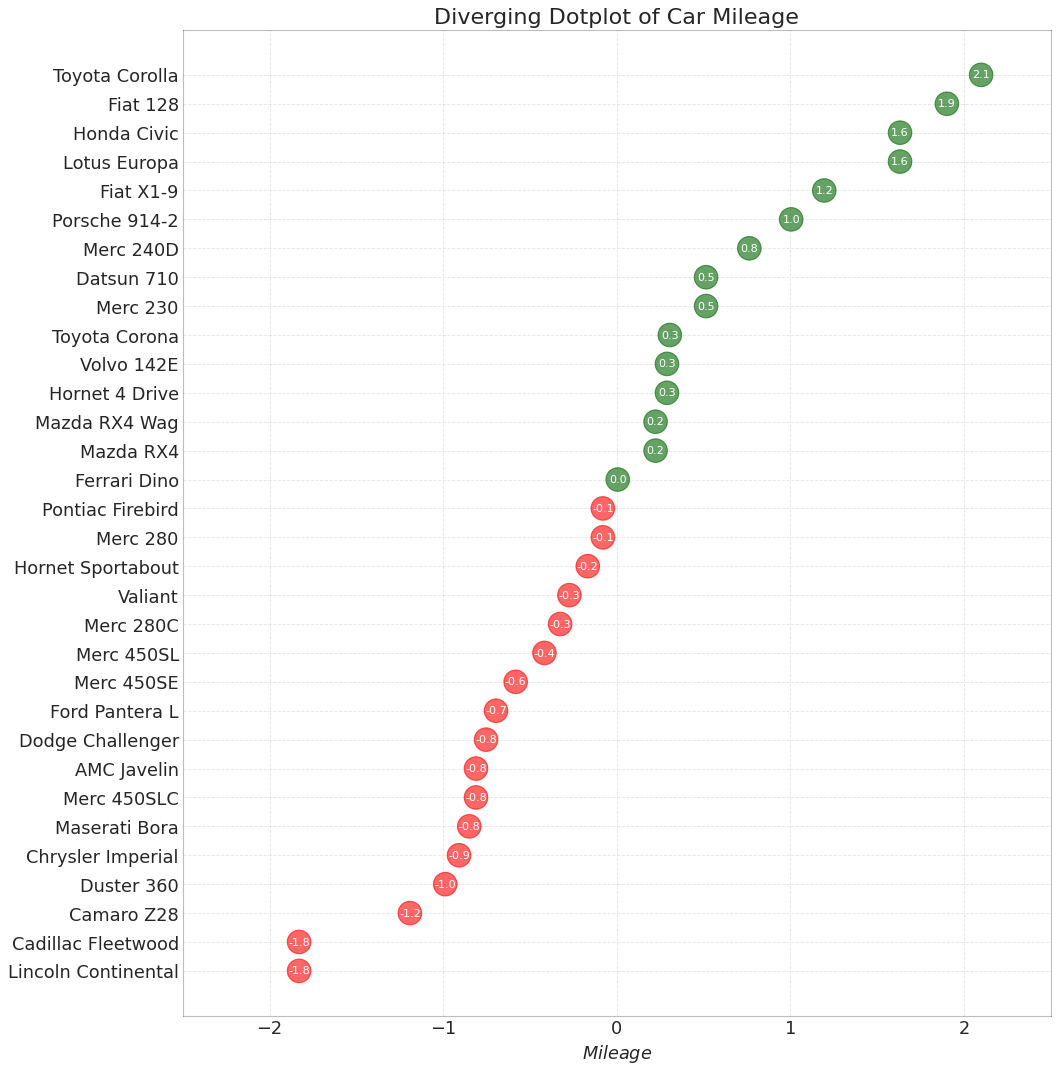

In [54]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,16), dpi= 80)
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center',
                 verticalalignment='center', fontdict={'color':'white'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df.index, df.cars)
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size':20})
plt.xlabel('$Mileage$')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

### 13) Расходящаяся диаграмма Lollipop с маркерами

Lollipop обеспечивает гибкий способ визуализации расхождения, делая акцент на любых значимых точках данных, на которые вы хотите обратить внимание.


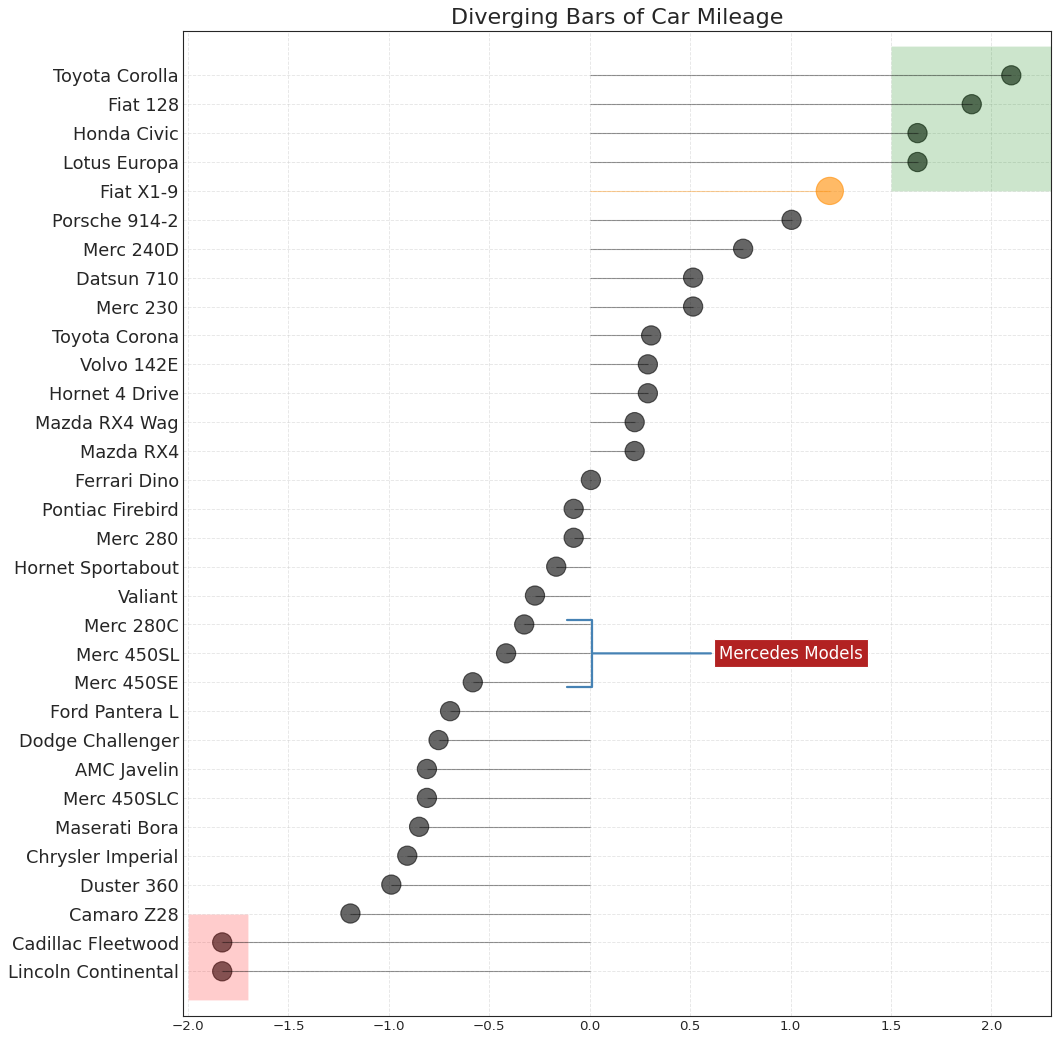

In [55]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)


# Draw plot
import matplotlib.patches as patches

plt.figure(figsize=(14,16), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

# Annotate
plt.annotate('Mercedes Models', xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data',
            fontsize=15, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5', lw=2.0, color='steelblue'), color='white')

# Add Patches
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

### 14) Диаграмма площади

Раскрашивая область между осью и линиями, диаграмма площади подчеркивает пики и впадины, но и на продолжительности максимумов и минимумов. Чем больше продолжительность максимумов, тем больше площадь под линией.


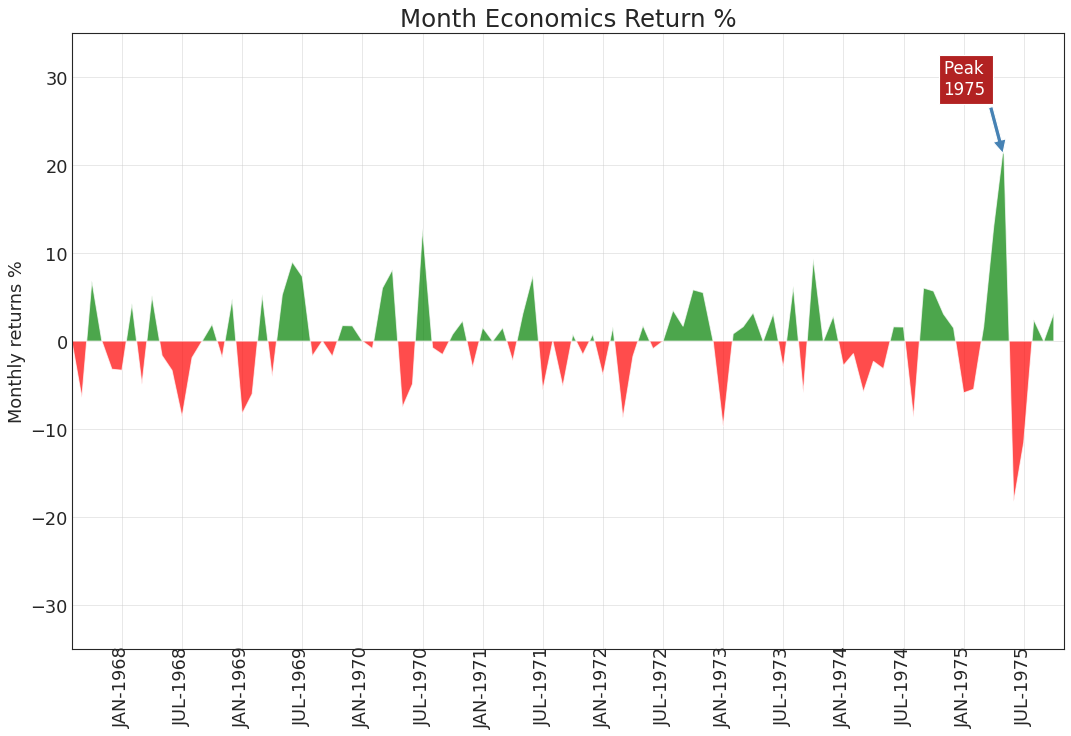

In [56]:
import numpy as np
import pandas as pd

# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(100)
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100

# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')


# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35,35)
plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.show()

### 15) Упорядоченная гистограмма

Упорядоченная гистограмма эффективно передает порядок ранжирования элементов. Но, добавив значение показателя над диаграммой, пользователь получает точную информацию от самой диаграммы.

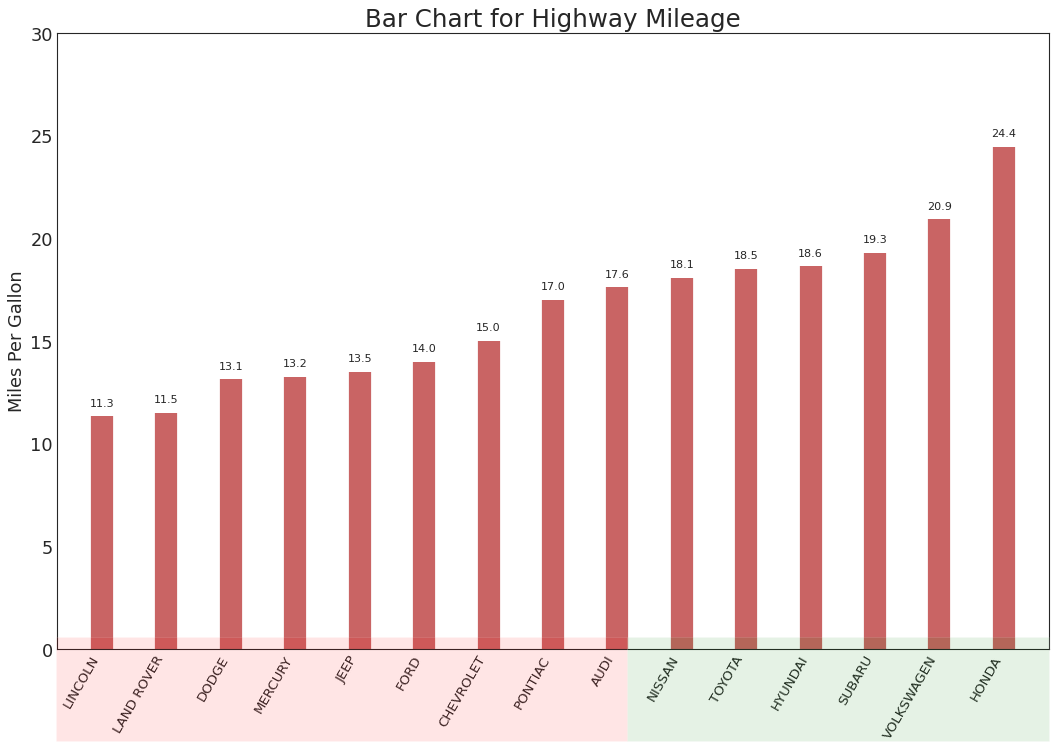

In [57]:
# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

### 16) Диаграмма Lollipop

Диаграмма Lollipop служит аналогичной цели как упорядоченная гистограмма визуально приятным способом.


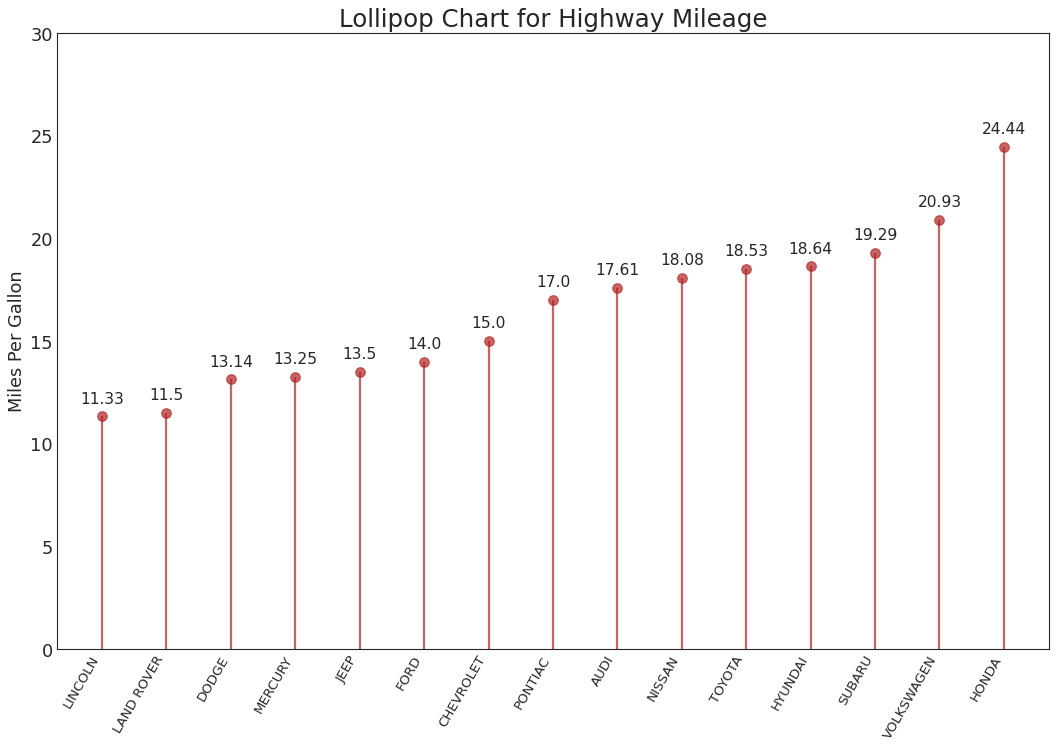

In [58]:
# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size':22})
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30)

# Annotate
for row in df.itertuples():
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

### 17) Поточечный график с подписями

Точечный график передает порядок ранжирования предметов. А поскольку он выровнен вдоль горизонтальной оси, вы можете визуально оценить, как далеко точки находятся друг от друга.

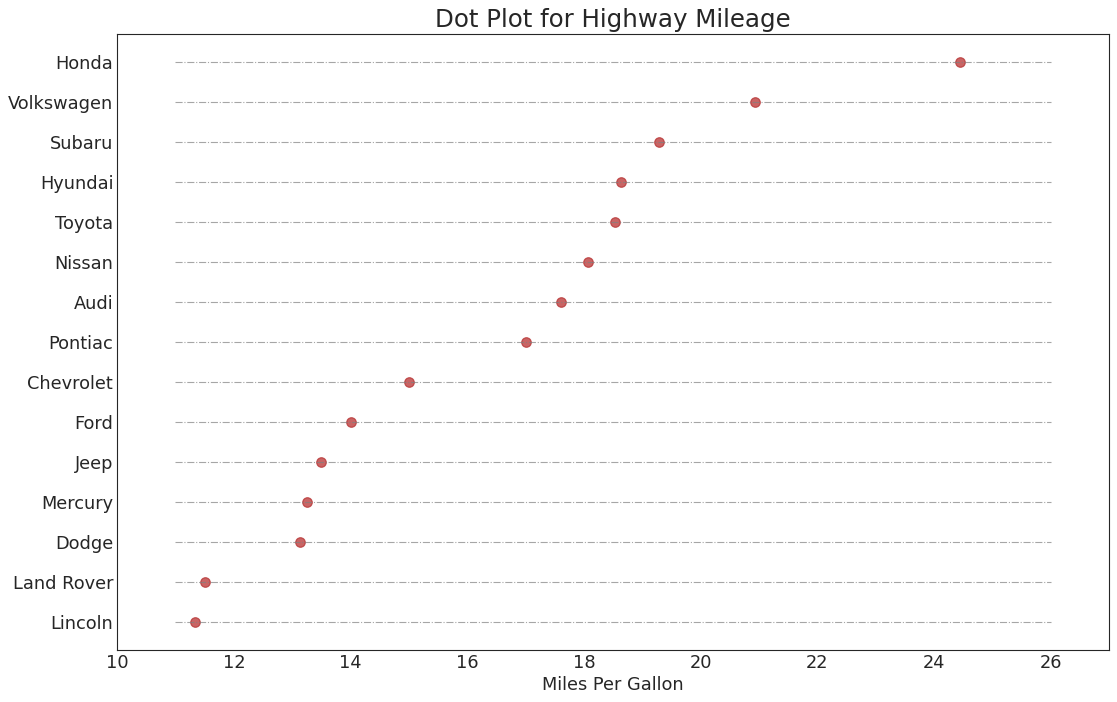

In [59]:
# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Highway Mileage', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon')
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(10, 27)
plt.show()

### 18) Наклонная карта

Диаграмма уклона наиболее подходит для сравнения позиций «До» и «После» данного человека / предмета.

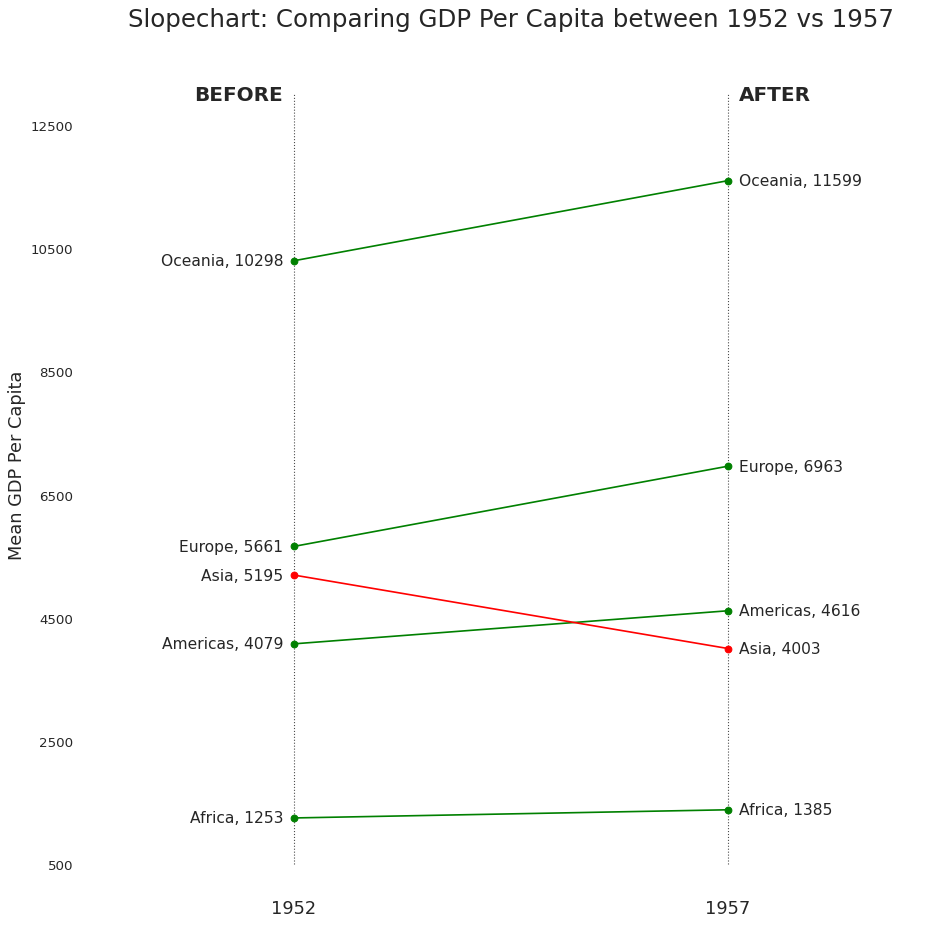

In [60]:
import matplotlib.lines as mlines
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")

left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

### 19) «Гантели»

График «Гантели» передает позиции «до» и «после» различных влияний, а также порядок ранжирования предметов. Это очень полезно, если вы хотите визуализировать влияние чего-либо на разные объекты.


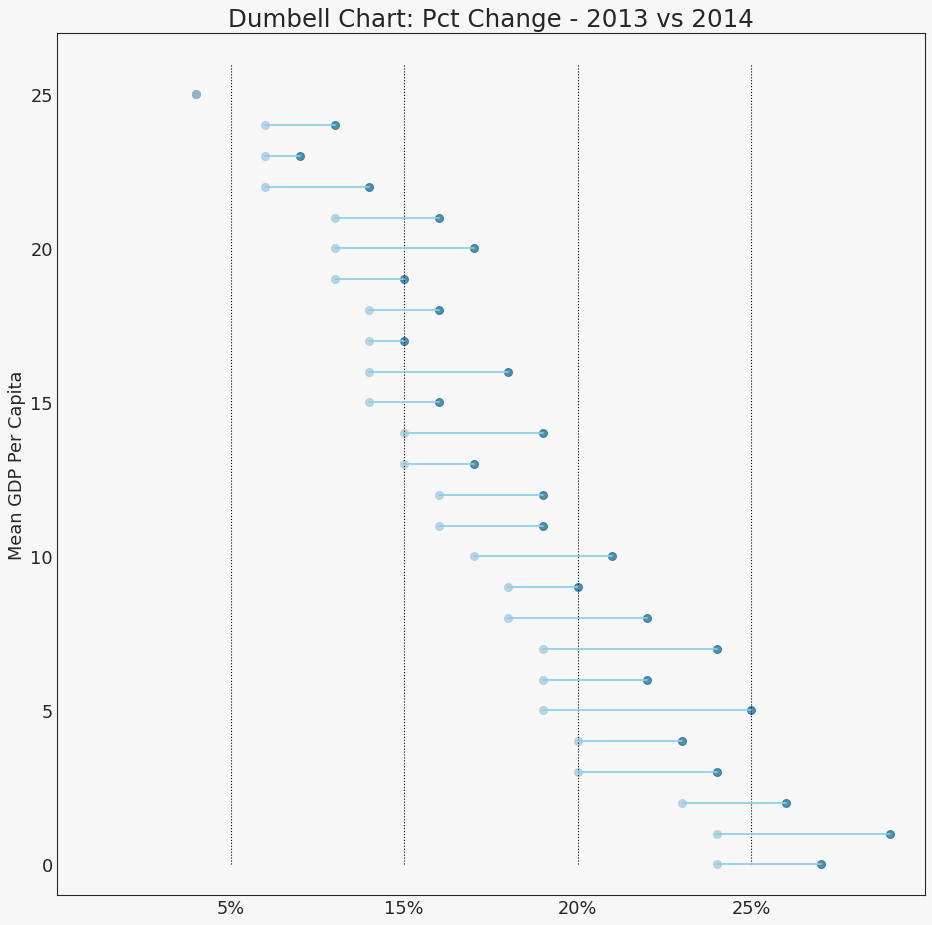

In [65]:
import matplotlib.lines as mlines

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")
df.sort_values('pct_2014', inplace=True)
df.reset_index(inplace=True)

# Func to draw line segment
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='skyblue')
    ax.add_line(l)
    return l

# Figure and Axes
fig, ax = plt.subplots(1,1,figsize=(14,14), facecolor='#f7f7f7', dpi= 80)

# Vertical Lines
ax.vlines(x=.05, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.10, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.15, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.20, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['index'], x=df['pct_2013'], s=50, color='#0e668b', alpha=0.7)
ax.scatter(y=df['index'], x=df['pct_2014'], s=50, color='#a3c4dc', alpha=0.7)

# Line Segments
for i, p1, p2 in zip(df['index'], df['pct_2013'], df['pct_2014']):
    newline([p1, i], [p2, i])

# Decoration
ax.set_facecolor('#f7f7f7')
ax.set_title("Dumbell Chart: Pct Change - 2013 vs 2014", fontdict={'size':22})
ax.set(xlim=(0,.25), ylim=(-1, 27), ylabel='Mean GDP Per Capita')
ax.set_xticks([.05, .1, .15, .20])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
plt.show()

### 20) Гистограмма для непрерывной переменной

Гистограмма показывает распределение частот данной переменной. Приведенное ниже представление группирует полосы частот на основе категориальной переменной.

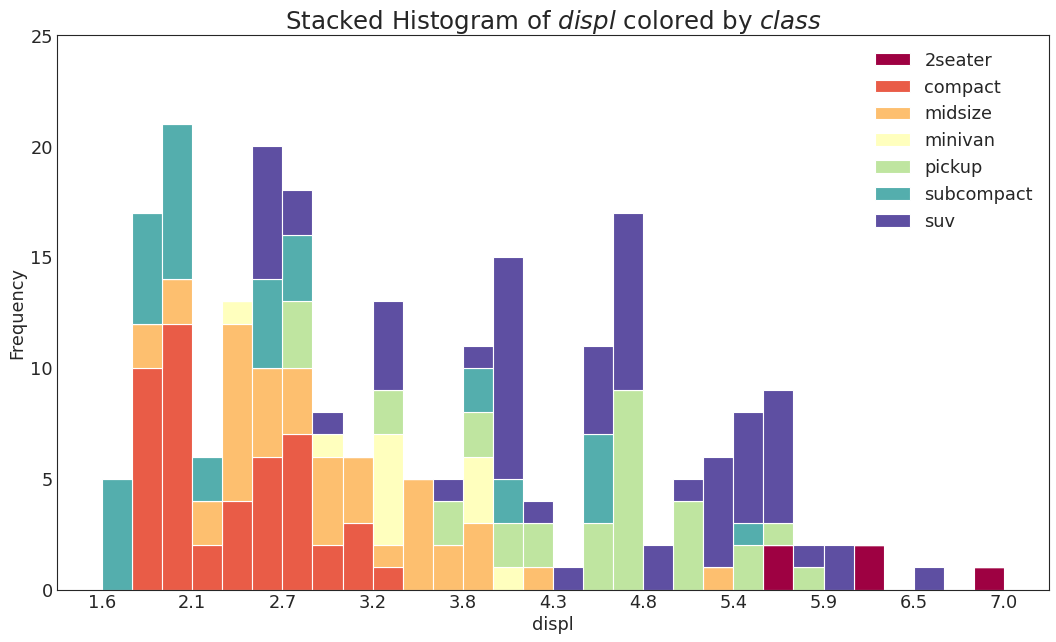

In [66]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare data
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

### 21) Гистограмма для категориальной переменной

Гистограмма категориальной переменной показывает распределение частоты этой переменной. Раскрашивая столбцы, вы можете визуализировать распределение в связи с другой категориальной переменной, представляющей цвета.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


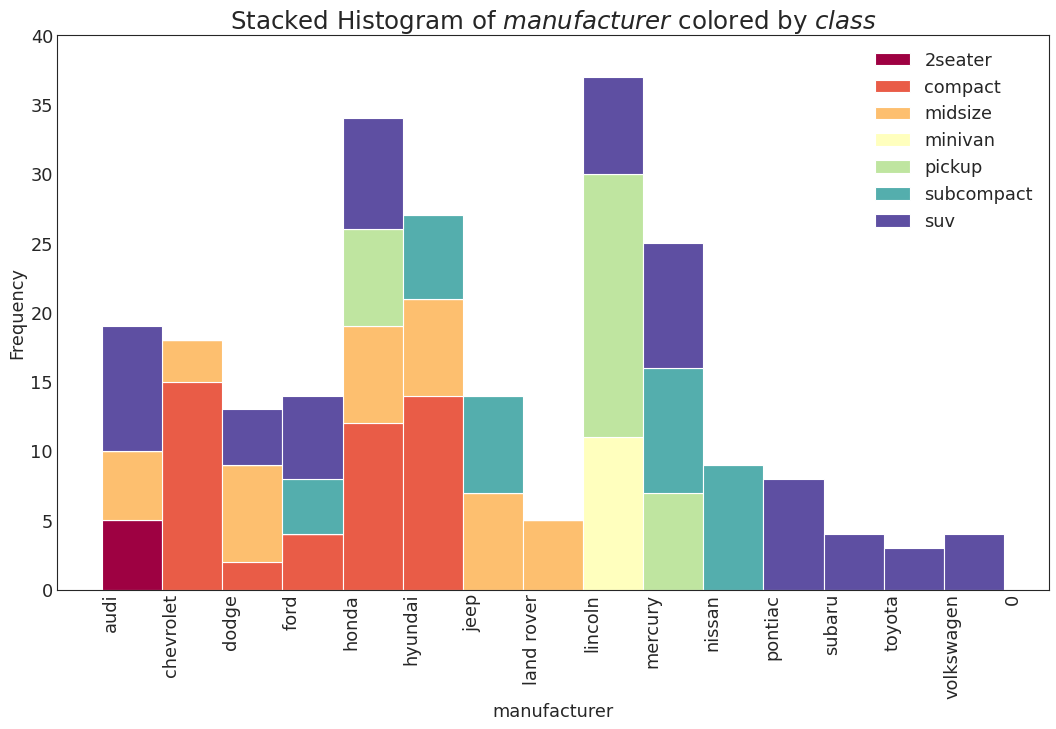

In [70]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare data
x_var = 'manufacturer'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 40)
labels=np.unique(df[x_var]).tolist()
labels.append('0')
plt.xticks(ticks=bins,labels = labels, rotation=90, horizontalalignment='left')
plt.show()

### 22) График плотности

Графики плотности являются широко используемым инструментом для визуализации распределения непрерывной переменной. Сгруппировав их по переменной «response», вы можете проверить взаимосвязь между X и Y. Ниже представлен пример, если для наглядности описать, как распределение пробега по городу меняется в зависимости от количества цилиндров.

<ipython-input-71-1b5fc9cf6444>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
<ipython-input-71-1b5fc9cf6444>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
<ipython-input-71-1b5fc9cf6444>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
<ipython-input-71-1b5fc9cf6444>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will bec

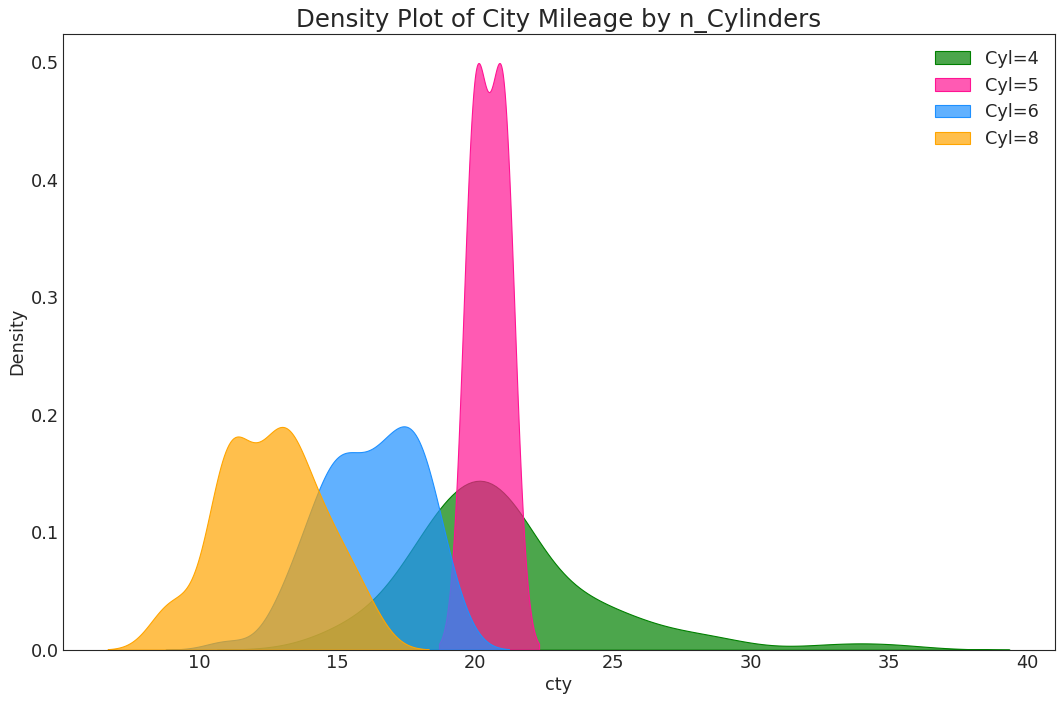

In [71]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

### 23) Кривые плотности с гистограммой

Кривая плотности с гистограммой объединяет сводную информацию, передаваемую двумя графиками, так что вы можете видеть оба в одном месте.

<ipython-input-72-73a5fded8ff9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
<ipython-input-72-73a5fded8ff9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[d

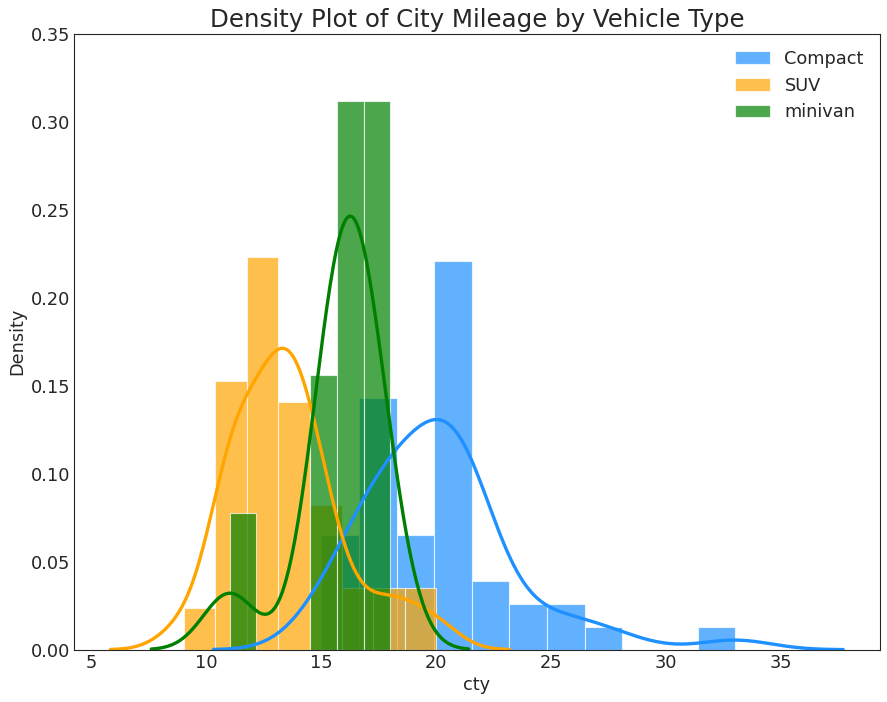

In [72]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan', "cty"], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.35)

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)
plt.legend()
plt.show()

### 24) График Joy

График Joy позволяет перекрывать кривые плотности разных групп, это отличный способ визуализировать распределение большого числа групп по отношению друг к другу. Это выглядит приятным для глаз и четко передает только правильную информацию.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

<Figure size 1280x800 with 0 Axes>

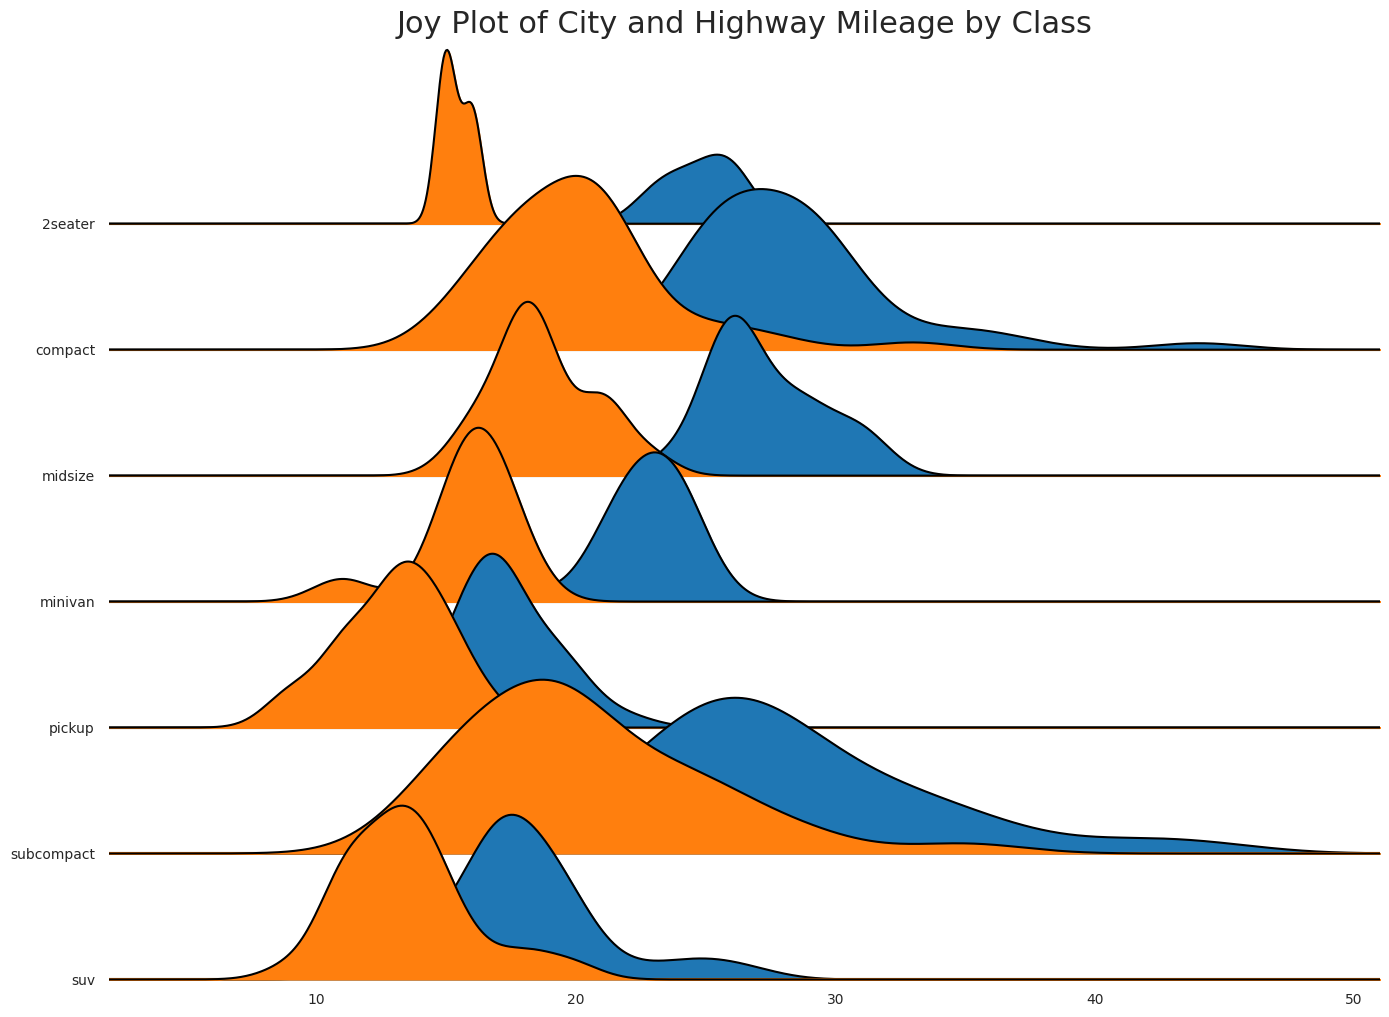

In [74]:
import joypy
# Import Data
mpg = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(mpg, column=['hwy', 'cty'], by="class", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.show()

### 26) Графики с прямоугольниками

Такие графики — отличный способ визуализировать распределение, зная медиану, 25-й, 75-й квартили и максимумы с минимумами. Однако вы должны быть осторожны при интерпретации размера полей, которые могут потенциально исказить количество точек, содержащихся в этой группе. Таким образом, ручное указание количества наблюдений в каждой ячейке поможет преодолеть этот недостаток.

Например, первые два прямоугольника слева одинакового размера, хотя они имеют 5 и 47 элементов данных соответственно. Поэтому необходимо отмечать количество наблюдений.




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


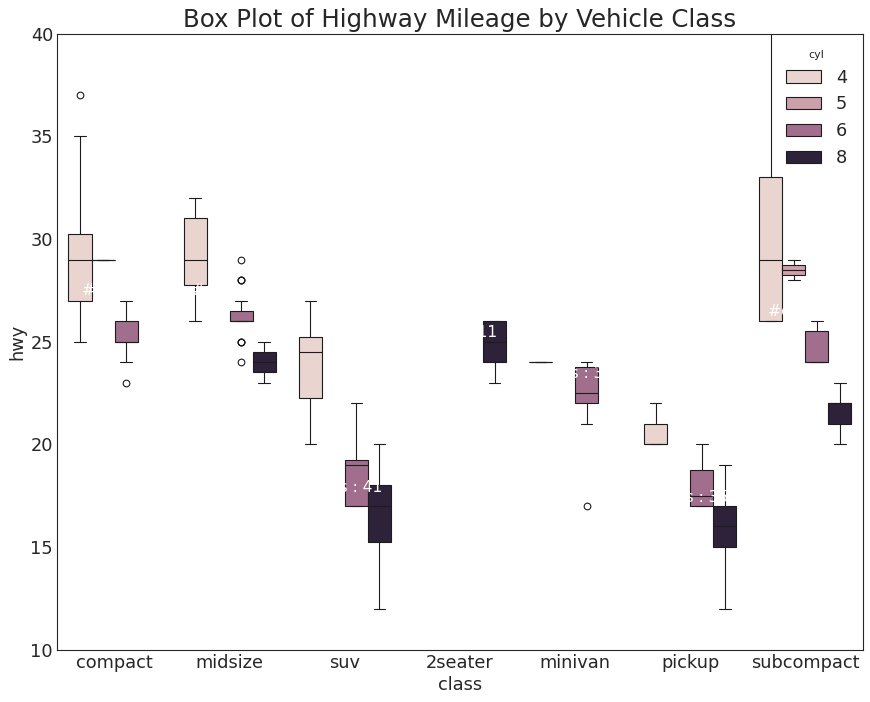

In [83]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', hue = 'cyl', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(df,group_col='class',y='hwy')

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()

### 27) Графики с прямоугольниками и точками

Dot + Box plot передает аналогичную информацию, как boxplot, разбитый на группы. Кроме того, точки дают представление о количестве элементов данных в каждой группе.

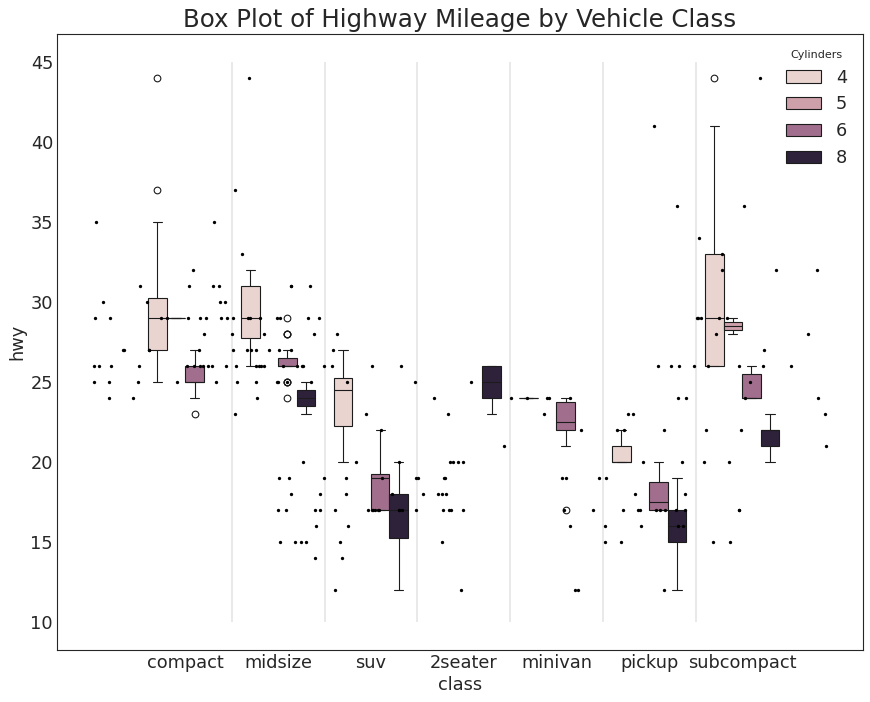

In [82]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, hue='cyl')
sns.stripplot(x='class', y='hwy', data=df, color='black', size=3, jitter=1)

for i in range(len(df['class'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.legend(title='Cylinders')
plt.show()

### 28) График «скрипками»

Такой график — это визуально приятная альтернатива boxplot. Форма или площадь «скрипки» зависит от количества данных в этой группе. Тем не менее, такие графики могут быть сложнее для чтения, и они обычно не используются в профессиональных условиях.

<ipython-input-86-cd99aa0292a7>:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='class', y='hwy', data=df, scale='width', inner='quartile')


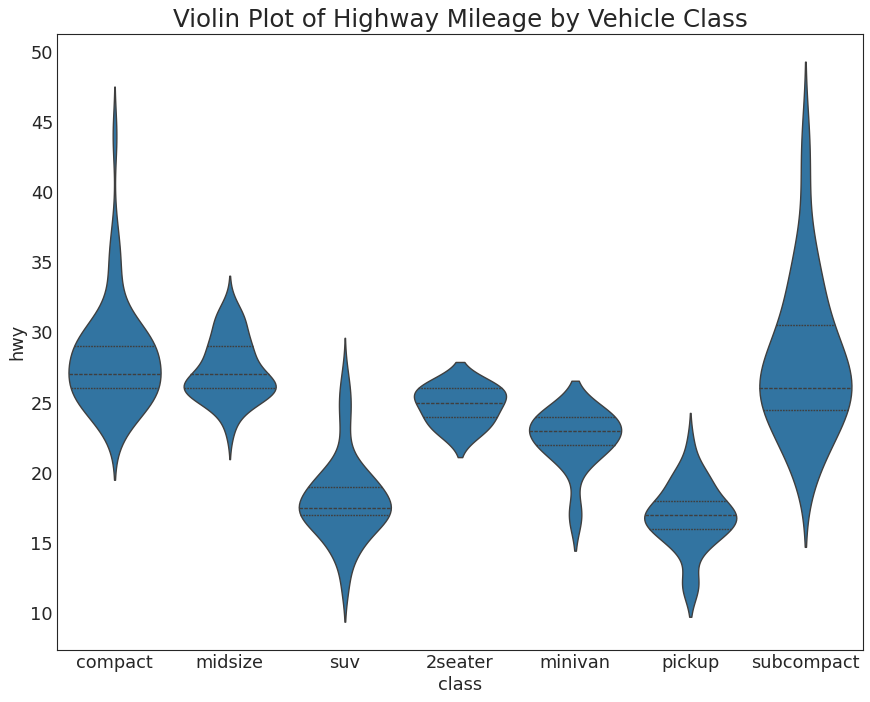

In [86]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='class', y='hwy', data=df, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.show()

### 29) Пирамида населенности

Популяционная пирамида может использоваться, чтобы показать распределение групп, упорядоченных по объему, или для показа поэтапной фильтрации населения, как это показано ниже, чтобы визуализировать, сколько людей проходит через каждую стадию воронки маркетинга.

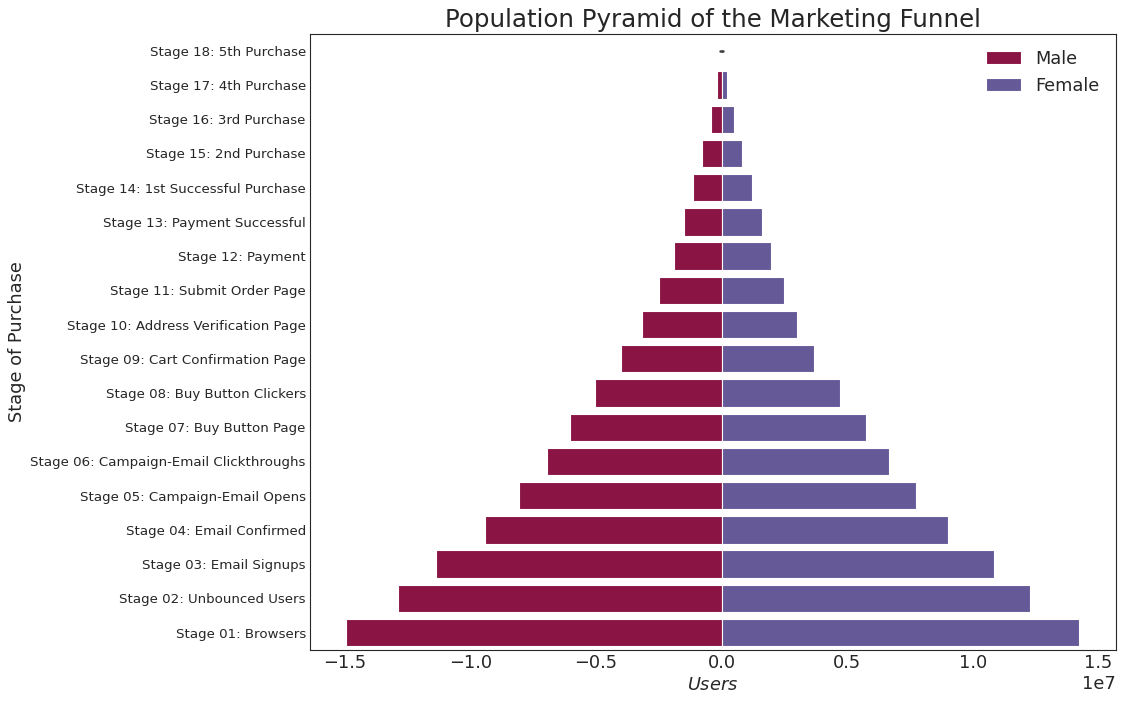

In [87]:
# Read data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'Gender'
order_of_bars = df.Stage.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]

for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users', y='Stage', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)

# Decorations
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()

### 30) Категориальные графики

Категориальные графики, предоставленные библиотекой seaborn, можно использовать для визуализации распределения количества двух или более категориальных переменных по отношению друг к другу.


<ipython-input-89-8818111afe5d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=titanic[titanic.deck.notnull()],


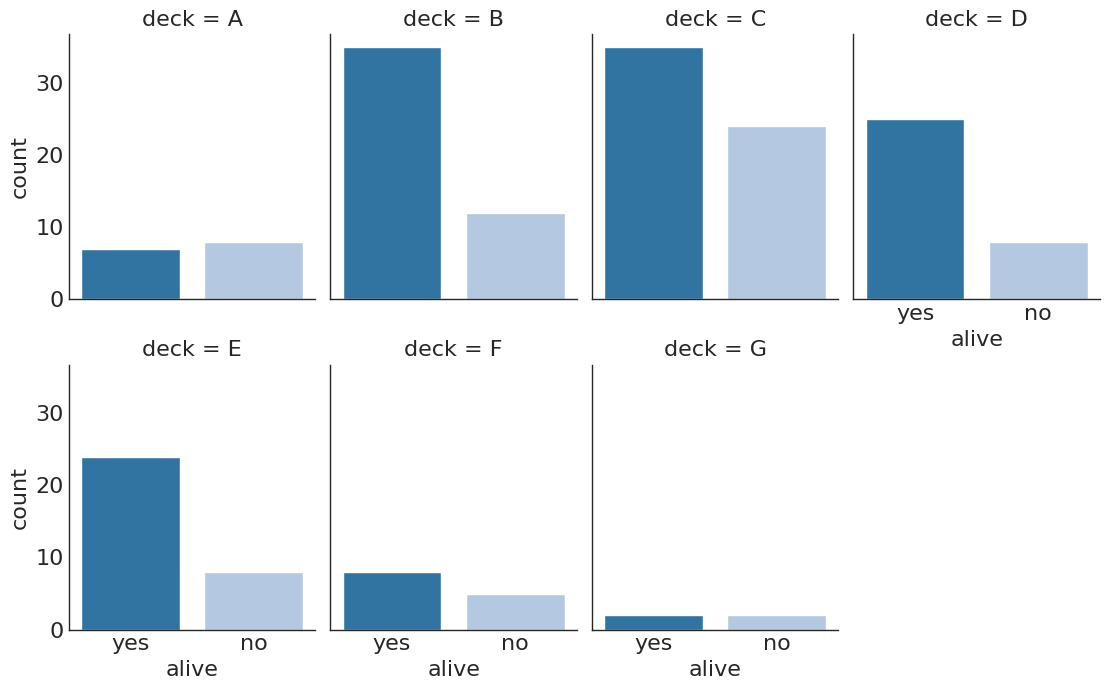

In [89]:
# Load Dataset
titanic = sns.load_dataset("titanic")

# Plot
g = sns.catplot(data=titanic[titanic.deck.notnull()],
                x= "alive", col="deck", col_wrap=4,
                kind="count", height=3.5, aspect=.8,
                palette='tab20')

fig.suptitle('sf')
plt.show()

<ipython-input-90-5c845fc1a68c>:5: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.catplot(x="age", y="embark_town",


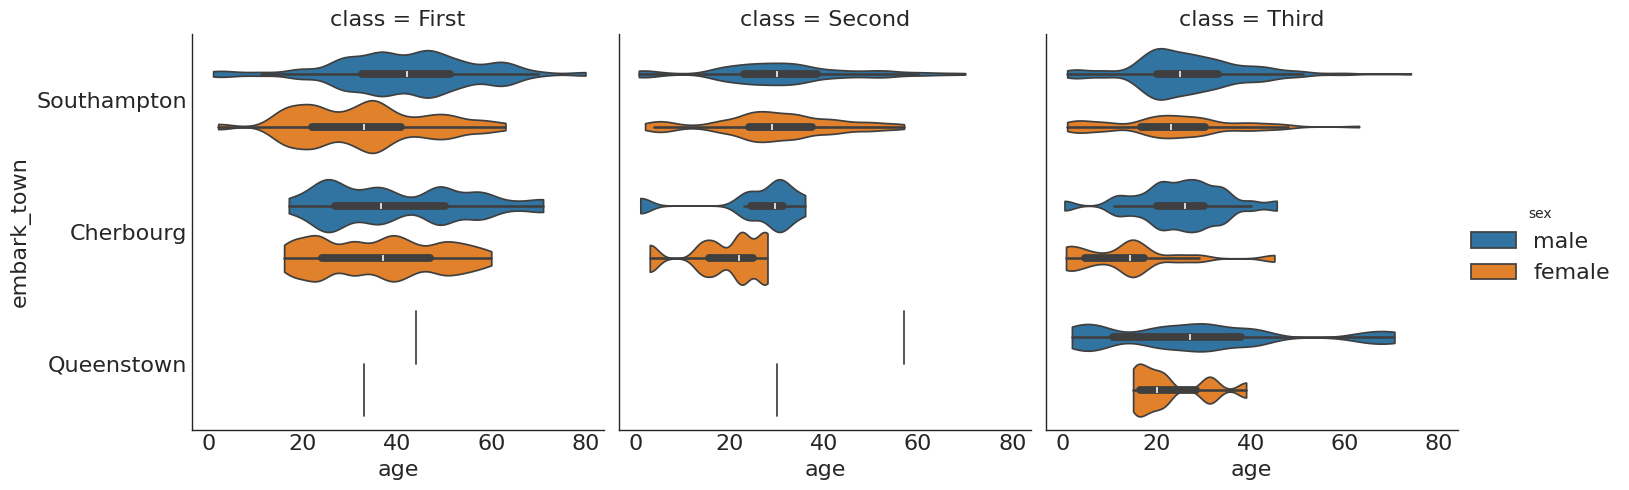

In [90]:
# Load Dataset
titanic = sns.load_dataset("titanic")

# Plot
sns.catplot(x="age", y="embark_town",
            hue="sex", col="class",
            data=titanic[titanic.embark_town.notnull()],
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)